# Table of contents

- Download latest data
- Retrain model
- Display current squad
- Use model to identify transfers
- Identify playing 11
- Show top performers by position

In [1]:
import pandas as pd
import torch
import numpy as np
import random
from random import shuffle
np.random.seed(17)
random.seed(17)
torch.manual_seed(17)
import wget
import os
import aiohttp
import asyncio
from fpl import FPL
from torch.utils.data import TensorDataset, DataLoader
from player import Player
from team import Team
from data_processor import get_fpl, get_current_squad
from agent import Agent
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
import pytorch_lightning as pl


## Download latest data, train model and save model.

In [2]:
model_type = "linear"
features = ["total_points", "ict_index", "clean_sheets", "saves", "assists", "was_home","goals_scored"]
logger = pl.loggers.TensorBoardLogger(f"lightning_logs/model_comparison/{model_type}")
trainer = pl.Trainer(max_epochs=50, gpus=torch.cuda.device_count(), logger=logger,  callbacks=[EarlyStopping(monitor="val_loss")])
agent = Agent(features, epochs=50, window=6, model_type=model_type)
await agent.get_data()
await agent.update_model(trainer)

GPU available: True, used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


/home/ajrfhp/anaconda3/envs/test/lib/python3.8/site-packages/pandas/core/frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/home/ajrfhp/Control/Control_FPL/data_processor.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_player_features["total_points"] = all_player_features["total_points"].clip(0, max_player_points)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



  | Name  | Type        | Params
--------------------------------------
0 | model | LinearModel | 43    
--------------------------------------
43        Trainable params
0         Non-trainable params
43        Total params
0.000     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Validation sanity check:   0%|                                                                    | 0/2 [00:00<?, ?it/s]

Validation sanity check:  50%|██████████████████████████████                              | 1/2 [00:00<00:00,  1.17it/s]

/home/ajrfhp/anaconda3/envs/test/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:322: UserWarning: The number of training samples (15) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: -1it [00:00, ?it/s]

Training:   0%|                                                                       | 0/19 [00:00<00:00, 29537.35it/s]

Epoch 0:   0%|                                                                         | 0/19 [00:00<00:00, 1483.13it/s]

Epoch 0:   5%|███▉                                                                       | 1/19 [00:00<00:04,  3.98it/s]

Epoch 0:   5%|██▊                                                   | 1/19 [00:00<00:04,  3.97it/s, loss=2.57, v_num=54]

Epoch 0:  11%|█████▋                                                | 2/19 [00:00<00:02,  5.86it/s, loss=2.57, v_num=54]

Epoch 0:  16%|████████▌                                             | 3/19 [00:00<00:02,  7.68it/s, loss=2.54, v_num=54]

Epoch 0:  21%|███████████▎                                          | 4/19 [00:00<00:01,  9.51it/s, loss=2.52, v_num=54]

Epoch 0:  26%|██████████████▏                                       | 5/19 [00:00<00:01, 11.26it/s, loss=2.51, v_num=54]

Epoch 0:  32%|█████████████████                                     | 6/19 [00:00<00:00, 13.00it/s, loss=2.49, v_num=54]

Epoch 0:  37%|███████████████████▉                                  | 7/19 [00:00<00:00, 14.67it/s, loss=2.47, v_num=54]

Epoch 0:  42%|██████████████████████▋                               | 8/19 [00:00<00:00, 16.28it/s, loss=2.44, v_num=54]

Epoch 0:  47%|█████████████████████████▌                            | 9/19 [00:00<00:00, 17.88it/s, loss=2.42, v_num=54]

Epoch 0:  53%|████████████████████████████▍                         | 10/19 [00:00<00:00, 19.46it/s, loss=2.4, v_num=54]

Epoch 0:  58%|██████████████████████████████▋                      | 11/19 [00:00<00:00, 20.94it/s, loss=2.38, v_num=54]

Epoch 0:  63%|█████████████████████████████████▍                   | 12/19 [00:00<00:00, 22.46it/s, loss=2.37, v_num=54]

Epoch 0:  68%|████████████████████████████████████▎                | 13/19 [00:00<00:00, 23.84it/s, loss=2.36, v_num=54]

Epoch 0:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 25.27it/s, loss=2.34, v_num=54]

Epoch 0:  79%|█████████████████████████████████████████▊           | 15/19 [00:00<00:00, 24.11it/s, loss=2.34, v_num=54]

Epoch 0:  79%|█████████████████████████████████████████▊           | 15/19 [00:00<00:00, 24.07it/s, loss=2.32, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  2.11it/s]

Epoch 0: 100%|█████████████████████████████████████████████████████| 19/19 [00:01<00:00, 16.51it/s, loss=2.32, v_num=54]

Epoch 0:   0%|                                                   | 0/19 [00:00<00:00, 34100.03it/s, loss=2.32, v_num=54]

Epoch 1:   0%|                                                    | 0/19 [00:00<00:00, 1165.08it/s, loss=2.32, v_num=54]

Epoch 1:   5%|██▉                                                    | 1/19 [00:00<00:04,  3.88it/s, loss=2.3, v_num=54]

Epoch 1:  11%|█████▋                                                | 2/19 [00:00<00:02,  5.71it/s, loss=2.29, v_num=54]

Epoch 1:  16%|████████▌                                             | 3/19 [00:00<00:02,  7.50it/s, loss=2.27, v_num=54]

Epoch 1:  21%|███████████▎                                          | 4/19 [00:00<00:01,  9.21it/s, loss=2.26, v_num=54]

Epoch 1:  26%|██████████████▏                                       | 5/19 [00:00<00:01, 10.87it/s, loss=2.24, v_num=54]

Epoch 1:  32%|█████████████████                                     | 6/19 [00:00<00:01, 12.52it/s, loss=2.21, v_num=54]

Epoch 1:  37%|███████████████████▉                                  | 7/19 [00:00<00:00, 14.10it/s, loss=2.18, v_num=54]

Epoch 1:  42%|██████████████████████▋                               | 8/19 [00:00<00:00, 15.64it/s, loss=2.14, v_num=54]

Epoch 1:  47%|█████████████████████████▌                            | 9/19 [00:00<00:00, 17.13it/s, loss=2.11, v_num=54]

Epoch 1:  53%|███████████████████████████▉                         | 10/19 [00:00<00:00, 18.67it/s, loss=2.08, v_num=54]

Epoch 1:  58%|██████████████████████████████▋                      | 11/19 [00:00<00:00, 20.08it/s, loss=2.05, v_num=54]

Epoch 1:  63%|█████████████████████████████████▍                   | 12/19 [00:00<00:00, 21.49it/s, loss=2.02, v_num=54]

Epoch 1:  68%|██████████████████████████████████████▎                 | 13/19 [00:00<00:00, 22.81it/s, loss=2, v_num=54]

Epoch 1:  74%|█████████████████████████████████████████▎              | 14/19 [00:00<00:00, 24.18it/s, loss=2, v_num=54]

Epoch 1:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 24.15it/s, loss=1.98, v_num=54]

Epoch 1:  79%|█████████████████████████████████████████▊           | 15/19 [00:00<00:00, 23.22it/s, loss=1.95, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.95it/s]

Epoch 1: 100%|█████████████████████████████████████████████████████| 19/19 [00:01<00:00, 15.51it/s, loss=1.95, v_num=54]

Epoch 1:   0%|                                                   | 0/19 [00:00<00:00, 30840.47it/s, loss=1.95, v_num=54]

Epoch 2:   0%|                                                    | 0/19 [00:00<00:00, 1392.99it/s, loss=1.95, v_num=54]

Epoch 2:   5%|██▊                                                   | 1/19 [00:00<00:04,  3.64it/s, loss=1.92, v_num=54]

Epoch 2:  11%|█████▋                                                | 2/19 [00:00<00:03,  5.38it/s, loss=1.89, v_num=54]

Epoch 2:  16%|████████▌                                             | 3/19 [00:00<00:02,  7.07it/s, loss=1.86, v_num=54]

Epoch 2:  21%|███████████▎                                          | 4/19 [00:00<00:01,  8.74it/s, loss=1.84, v_num=54]

Epoch 2:  26%|██████████████▏                                       | 5/19 [00:00<00:01, 10.37it/s, loss=1.82, v_num=54]

Epoch 2:  32%|█████████████████▎                                     | 6/19 [00:00<00:01, 11.94it/s, loss=1.8, v_num=54]

Epoch 2:  37%|███████████████████▉                                  | 7/19 [00:00<00:00, 13.51it/s, loss=1.78, v_num=54]

Epoch 2:  42%|██████████████████████▋                               | 8/19 [00:00<00:00, 15.03it/s, loss=1.75, v_num=54]

Epoch 2:  47%|█████████████████████████▌                            | 9/19 [00:00<00:00, 16.54it/s, loss=1.72, v_num=54]

Epoch 2:  53%|████████████████████████████▍                         | 10/19 [00:00<00:00, 17.94it/s, loss=1.7, v_num=54]

Epoch 2:  58%|██████████████████████████████▋                      | 11/19 [00:00<00:00, 19.34it/s, loss=1.68, v_num=54]

Epoch 2:  63%|█████████████████████████████████▍                   | 12/19 [00:00<00:00, 20.74it/s, loss=1.66, v_num=54]

Epoch 2:  68%|████████████████████████████████████▎                | 13/19 [00:00<00:00, 22.08it/s, loss=1.64, v_num=54]

Epoch 2:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 23.48it/s, loss=1.64, v_num=54]

Epoch 2:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 23.44it/s, loss=1.63, v_num=54]

Epoch 2:  79%|█████████████████████████████████████████▊           | 15/19 [00:00<00:00, 22.52it/s, loss=1.61, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.93it/s]

Epoch 2: 100%|█████████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.95it/s, loss=1.61, v_num=54]

Epoch 2:   0%|                                                   | 0/19 [00:00<00:00, 21290.88it/s, loss=1.61, v_num=54]

Epoch 3:   0%|                                                    | 0/19 [00:00<00:00, 1105.80it/s, loss=1.61, v_num=54]

Epoch 3:   5%|██▊                                                   | 1/19 [00:00<00:04,  3.74it/s, loss=1.59, v_num=54]

Epoch 3:  11%|█████▋                                                | 2/19 [00:00<00:03,  5.52it/s, loss=1.57, v_num=54]

Epoch 3:  16%|████████▌                                             | 3/19 [00:00<00:02,  7.26it/s, loss=1.55, v_num=54]

Epoch 3:  21%|███████████▎                                          | 4/19 [00:00<00:01,  8.96it/s, loss=1.53, v_num=54]

Epoch 3:  26%|██████████████▏                                       | 5/19 [00:00<00:01, 10.58it/s, loss=1.52, v_num=54]

Epoch 3:  32%|█████████████████                                     | 6/19 [00:00<00:01, 12.15it/s, loss=1.51, v_num=54]

Epoch 3:  37%|███████████████████▉                                  | 7/19 [00:00<00:00, 13.69it/s, loss=1.49, v_num=54]

Epoch 3:  42%|██████████████████████▋                               | 8/19 [00:00<00:00, 15.21it/s, loss=1.47, v_num=54]

Epoch 3:  47%|█████████████████████████▌                            | 9/19 [00:00<00:00, 16.65it/s, loss=1.45, v_num=54]

Epoch 3:  53%|███████████████████████████▉                         | 10/19 [00:00<00:00, 18.08it/s, loss=1.44, v_num=54]

Epoch 3:  58%|██████████████████████████████▋                      | 11/19 [00:00<00:00, 19.50it/s, loss=1.42, v_num=54]

Epoch 3:  63%|█████████████████████████████████▍                   | 12/19 [00:00<00:00, 20.85it/s, loss=1.41, v_num=54]

Epoch 3:  68%|████████████████████████████████████▉                 | 13/19 [00:00<00:00, 22.18it/s, loss=1.4, v_num=54]

Epoch 3:  74%|███████████████████████████████████████▊              | 14/19 [00:00<00:00, 23.53it/s, loss=1.4, v_num=54]

Epoch 3:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 23.49it/s, loss=1.39, v_num=54]

Epoch 3:  79%|█████████████████████████████████████████▊           | 15/19 [00:00<00:00, 21.93it/s, loss=1.37, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.77it/s]

Epoch 3: 100%|█████████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.25it/s, loss=1.37, v_num=54]

Epoch 3:   0%|                                                   | 0/19 [00:00<00:00, 20763.88it/s, loss=1.37, v_num=54]

Epoch 4:   0%|                                                    | 0/19 [00:00<00:00, 1238.35it/s, loss=1.37, v_num=54]

Epoch 4:   5%|██▊                                                   | 1/19 [00:00<00:04,  3.72it/s, loss=1.36, v_num=54]

Epoch 4:  11%|█████▋                                                | 2/19 [00:00<00:03,  5.50it/s, loss=1.35, v_num=54]

Epoch 4:  16%|████████▌                                             | 3/19 [00:00<00:02,  7.23it/s, loss=1.33, v_num=54]

Epoch 4:  21%|███████████▎                                          | 4/19 [00:00<00:01,  8.92it/s, loss=1.32, v_num=54]

Epoch 4:  26%|██████████████▏                                       | 5/19 [00:00<00:01, 10.52it/s, loss=1.32, v_num=54]

Epoch 4:  32%|█████████████████                                     | 6/19 [00:00<00:01, 12.14it/s, loss=1.31, v_num=54]

Epoch 4:  37%|████████████████████▎                                  | 7/19 [00:00<00:00, 13.73it/s, loss=1.3, v_num=54]

Epoch 4:  42%|██████████████████████▋                               | 8/19 [00:00<00:00, 15.23it/s, loss=1.29, v_num=54]

Epoch 4:  47%|█████████████████████████▌                            | 9/19 [00:00<00:00, 16.73it/s, loss=1.27, v_num=54]

Epoch 4:  53%|███████████████████████████▉                         | 10/19 [00:00<00:00, 18.20it/s, loss=1.26, v_num=54]

Epoch 4:  58%|██████████████████████████████▋                      | 11/19 [00:00<00:00, 19.64it/s, loss=1.25, v_num=54]

Epoch 4:  63%|█████████████████████████████████▍                   | 12/19 [00:00<00:00, 20.99it/s, loss=1.24, v_num=54]

Epoch 4:  68%|████████████████████████████████████▎                | 13/19 [00:00<00:00, 22.34it/s, loss=1.23, v_num=54]

Epoch 4:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 23.66it/s, loss=1.23, v_num=54]

Epoch 4:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 23.61it/s, loss=1.23, v_num=54]

Epoch 4:  79%|█████████████████████████████████████████▊           | 15/19 [00:00<00:00, 22.00it/s, loss=1.22, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.83it/s]

Epoch 4: 100%|█████████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.49it/s, loss=1.22, v_num=54]

Epoch 4:   0%|                                                   | 0/19 [00:00<00:00, 19239.93it/s, loss=1.22, v_num=54]

Epoch 5:   0%|                                                     | 0/19 [00:00<00:00, 999.60it/s, loss=1.22, v_num=54]

Epoch 5:   5%|██▊                                                   | 1/19 [00:00<00:05,  3.54it/s, loss=1.21, v_num=54]

Epoch 5:  11%|█████▊                                                 | 2/19 [00:00<00:03,  5.25it/s, loss=1.2, v_num=54]

Epoch 5:  16%|████████▌                                             | 3/19 [00:00<00:02,  6.91it/s, loss=1.19, v_num=54]

Epoch 5:  21%|███████████▎                                          | 4/19 [00:00<00:01,  8.51it/s, loss=1.18, v_num=54]

Epoch 5:  26%|██████████████▏                                       | 5/19 [00:00<00:01, 10.05it/s, loss=1.18, v_num=54]

Epoch 5:  32%|█████████████████                                     | 6/19 [00:00<00:01, 11.60it/s, loss=1.17, v_num=54]

Epoch 5:  37%|███████████████████▉                                  | 7/19 [00:00<00:00, 13.11it/s, loss=1.17, v_num=54]

Epoch 5:  42%|██████████████████████▋                               | 8/19 [00:00<00:00, 14.61it/s, loss=1.16, v_num=54]

Epoch 5:  47%|█████████████████████████▌                            | 9/19 [00:00<00:00, 16.07it/s, loss=1.15, v_num=54]

Epoch 5:  53%|███████████████████████████▉                         | 10/19 [00:00<00:00, 17.46it/s, loss=1.14, v_num=54]

Epoch 5:  58%|██████████████████████████████▋                      | 11/19 [00:00<00:00, 18.82it/s, loss=1.13, v_num=54]

Epoch 5:  63%|█████████████████████████████████▍                   | 12/19 [00:00<00:00, 20.19it/s, loss=1.12, v_num=54]

Epoch 5:  68%|████████████████████████████████████▎                | 13/19 [00:00<00:00, 21.48it/s, loss=1.12, v_num=54]

Epoch 5:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 22.81it/s, loss=1.12, v_num=54]

Epoch 5:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 22.79it/s, loss=1.12, v_num=54]

Epoch 5:  79%|█████████████████████████████████████████▊           | 15/19 [00:00<00:00, 21.71it/s, loss=1.11, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.67it/s]

Epoch 5: 100%|█████████████████████████████████████████████████████| 19/19 [00:01<00:00, 13.91it/s, loss=1.11, v_num=54]

Epoch 5:   0%|                                                   | 0/19 [00:00<00:00, 24244.53it/s, loss=1.11, v_num=54]

Epoch 6:   0%|                                                    | 0/19 [00:00<00:00, 1313.18it/s, loss=1.11, v_num=54]

Epoch 6:   5%|██▉                                                    | 1/19 [00:00<00:04,  3.89it/s, loss=1.1, v_num=54]

Epoch 6:  11%|█████▊                                                 | 2/19 [00:00<00:02,  5.72it/s, loss=1.1, v_num=54]

Epoch 6:  16%|████████▌                                             | 3/19 [00:00<00:02,  7.54it/s, loss=1.09, v_num=54]

Epoch 6:  21%|███████████▎                                          | 4/19 [00:00<00:01,  9.31it/s, loss=1.08, v_num=54]

Epoch 6:  26%|██████████████▏                                       | 5/19 [00:00<00:01, 11.00it/s, loss=1.08, v_num=54]

Epoch 6:  32%|█████████████████                                     | 6/19 [00:00<00:01, 12.66it/s, loss=1.08, v_num=54]

Epoch 6:  37%|███████████████████▉                                  | 7/19 [00:00<00:00, 14.22it/s, loss=1.08, v_num=54]

Epoch 6:  42%|██████████████████████▋                               | 8/19 [00:00<00:00, 15.81it/s, loss=1.07, v_num=54]

Epoch 6:  47%|█████████████████████████▌                            | 9/19 [00:00<00:00, 17.37it/s, loss=1.06, v_num=54]

Epoch 6:  53%|███████████████████████████▉                         | 10/19 [00:00<00:00, 18.93it/s, loss=1.06, v_num=54]

Epoch 6:  58%|██████████████████████████████▋                      | 11/19 [00:00<00:00, 20.34it/s, loss=1.05, v_num=54]

Epoch 6:  63%|█████████████████████████████████▍                   | 12/19 [00:00<00:00, 21.81it/s, loss=1.04, v_num=54]

Epoch 6:  68%|████████████████████████████████████▎                | 13/19 [00:00<00:00, 23.19it/s, loss=1.04, v_num=54]

Epoch 6:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 24.56it/s, loss=1.04, v_num=54]

Epoch 6:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 24.52it/s, loss=1.04, v_num=54]

Epoch 6:  79%|█████████████████████████████████████████▊           | 15/19 [00:00<00:00, 22.90it/s, loss=1.03, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.76it/s]

Epoch 6: 100%|█████████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.56it/s, loss=1.03, v_num=54]

Epoch 6:   0%|                                                   | 0/19 [00:00<00:00, 25890.77it/s, loss=1.03, v_num=54]

Epoch 7:   0%|                                                    | 0/19 [00:00<00:00, 1254.28it/s, loss=1.03, v_num=54]

Epoch 7:   5%|██▊                                                   | 1/19 [00:00<00:04,  3.77it/s, loss=1.03, v_num=54]

Epoch 7:  11%|█████▋                                                | 2/19 [00:00<00:03,  5.56it/s, loss=1.02, v_num=54]

Epoch 7:  16%|████████▌                                             | 3/19 [00:00<00:02,  7.29it/s, loss=1.02, v_num=54]

Epoch 7:  21%|███████████▎                                          | 4/19 [00:00<00:01,  9.01it/s, loss=1.02, v_num=54]

Epoch 7:  26%|██████████████▏                                       | 5/19 [00:00<00:01, 10.65it/s, loss=1.02, v_num=54]

Epoch 7:  32%|█████████████████                                     | 6/19 [00:00<00:01, 12.28it/s, loss=1.01, v_num=54]

Epoch 7:  37%|███████████████████▉                                  | 7/19 [00:00<00:00, 13.83it/s, loss=1.01, v_num=54]

Epoch 7:  42%|██████████████████████▋                               | 8/19 [00:00<00:00, 15.41it/s, loss=1.01, v_num=54]

Epoch 7:  47%|█████████████████████████                            | 9/19 [00:00<00:00, 16.97it/s, loss=0.999, v_num=54]

Epoch 7:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 18.44it/s, loss=0.996, v_num=54]

Epoch 7:  58%|██████████████████████████████                      | 11/19 [00:00<00:00, 19.87it/s, loss=0.992, v_num=54]

Epoch 7:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 21.27it/s, loss=0.986, v_num=54]

Epoch 7:  68%|███████████████████████████████████▌                | 13/19 [00:00<00:00, 22.61it/s, loss=0.986, v_num=54]

Epoch 7:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 23.94it/s, loss=0.986, v_num=54]

Epoch 7:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 23.89it/s, loss=0.986, v_num=54]

Epoch 7:  79%|█████████████████████████████████████████           | 15/19 [00:00<00:00, 22.81it/s, loss=0.977, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.73it/s]

Epoch 7: 100%|████████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.33it/s, loss=0.977, v_num=54]

Epoch 7:   0%|                                                  | 0/19 [00:00<00:00, 25731.93it/s, loss=0.977, v_num=54]

Epoch 8:   0%|                                                   | 0/19 [00:00<00:00, 1114.02it/s, loss=0.977, v_num=54]

Epoch 8:   5%|██▊                                                  | 1/19 [00:00<00:04,  3.78it/s, loss=0.973, v_num=54]

Epoch 8:  11%|█████▋                                                | 2/19 [00:00<00:03,  5.55it/s, loss=0.97, v_num=54]

Epoch 8:  16%|████████▎                                            | 3/19 [00:00<00:02,  7.28it/s, loss=0.964, v_num=54]

Epoch 8:  21%|███████████▏                                         | 4/19 [00:00<00:01,  8.99it/s, loss=0.964, v_num=54]

Epoch 8:  26%|█████████████▉                                       | 5/19 [00:00<00:01, 10.62it/s, loss=0.966, v_num=54]

Epoch 8:  32%|████████████████▋                                    | 6/19 [00:00<00:01, 12.19it/s, loss=0.964, v_num=54]

Epoch 8:  37%|███████████████████▌                                 | 7/19 [00:00<00:00, 13.77it/s, loss=0.964, v_num=54]

Epoch 8:  42%|██████████████████████▎                              | 8/19 [00:00<00:00, 15.33it/s, loss=0.961, v_num=54]

Epoch 8:  47%|█████████████████████████                            | 9/19 [00:00<00:00, 16.81it/s, loss=0.952, v_num=54]

Epoch 8:  53%|███████████████████████████▉                         | 10/19 [00:00<00:00, 18.30it/s, loss=0.95, v_num=54]

Epoch 8:  58%|██████████████████████████████                      | 11/19 [00:00<00:00, 19.71it/s, loss=0.947, v_num=54]

Epoch 8:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 21.10it/s, loss=0.942, v_num=54]

Epoch 8:  68%|███████████████████████████████████▌                | 13/19 [00:00<00:00, 22.46it/s, loss=0.942, v_num=54]

Epoch 8:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 23.86it/s, loss=0.942, v_num=54]

Epoch 8:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 23.83it/s, loss=0.942, v_num=54]

Epoch 8:  79%|█████████████████████████████████████████           | 15/19 [00:00<00:00, 22.34it/s, loss=0.935, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.79it/s]

Epoch 8: 100%|████████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.48it/s, loss=0.935, v_num=54]

Epoch 8:   0%|                                                  | 0/19 [00:00<00:00, 27962.03it/s, loss=0.935, v_num=54]

Epoch 9:   0%|                                                   | 0/19 [00:00<00:00, 1488.40it/s, loss=0.935, v_num=54]

Epoch 9:   5%|██▊                                                  | 1/19 [00:00<00:04,  3.67it/s, loss=0.931, v_num=54]

Epoch 9:  11%|█████▌                                               | 2/19 [00:00<00:03,  5.43it/s, loss=0.929, v_num=54]

Epoch 9:  16%|████████▎                                            | 3/19 [00:00<00:02,  7.16it/s, loss=0.924, v_num=54]

Epoch 9:  21%|███████████▏                                         | 4/19 [00:00<00:01,  8.83it/s, loss=0.925, v_num=54]

Epoch 9:  26%|█████████████▉                                       | 5/19 [00:00<00:01, 10.43it/s, loss=0.927, v_num=54]

Epoch 9:  32%|████████████████▋                                    | 6/19 [00:00<00:01, 12.04it/s, loss=0.926, v_num=54]

Epoch 9:  37%|███████████████████▌                                 | 7/19 [00:00<00:00, 13.44it/s, loss=0.926, v_num=54]

Epoch 9:  42%|██████████████████████▎                              | 8/19 [00:00<00:00, 14.93it/s, loss=0.923, v_num=54]

Epoch 9:  47%|█████████████████████████                            | 9/19 [00:00<00:00, 16.42it/s, loss=0.916, v_num=54]

Epoch 9:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 17.90it/s, loss=0.915, v_num=54]

Epoch 9:  58%|██████████████████████████████                      | 11/19 [00:00<00:00, 19.36it/s, loss=0.912, v_num=54]

Epoch 9:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 20.77it/s, loss=0.908, v_num=54]

Epoch 9:  68%|███████████████████████████████████▌                | 13/19 [00:00<00:00, 22.16it/s, loss=0.909, v_num=54]

Epoch 9:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 23.53it/s, loss=0.909, v_num=54]

Epoch 9:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 23.49it/s, loss=0.908, v_num=54]

Epoch 9:  79%|█████████████████████████████████████████           | 15/19 [00:00<00:00, 22.63it/s, loss=0.902, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.78it/s]

Epoch 9: 100%|████████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.44it/s, loss=0.902, v_num=54]

Epoch 9:   0%|                                                  | 0/19 [00:00<00:00, 22671.91it/s, loss=0.902, v_num=54]

Epoch 10:   0%|                                                  | 0/19 [00:00<00:00, 1276.42it/s, loss=0.902, v_num=54]

Epoch 10:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.87it/s, loss=0.899, v_num=54]

Epoch 10:  11%|█████▍                                              | 2/19 [00:00<00:02,  5.69it/s, loss=0.897, v_num=54]

Epoch 10:  16%|████████▏                                           | 3/19 [00:00<00:02,  7.45it/s, loss=0.893, v_num=54]

Epoch 10:  21%|██████████▉                                         | 4/19 [00:00<00:01,  9.10it/s, loss=0.894, v_num=54]

Epoch 10:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.78it/s, loss=0.897, v_num=54]

Epoch 10:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 12.39it/s, loss=0.896, v_num=54]

Epoch 10:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 14.00it/s, loss=0.897, v_num=54]

Epoch 10:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 15.58it/s, loss=0.894, v_num=54]

Epoch 10:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 17.04it/s, loss=0.888, v_num=54]

Epoch 10:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 18.54it/s, loss=0.887, v_num=54]

Epoch 10:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 19.87it/s, loss=0.885, v_num=54]

Epoch 10:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 21.14it/s, loss=0.881, v_num=54]

Epoch 10:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 22.42it/s, loss=0.882, v_num=54]

Epoch 10:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.77it/s, loss=0.882, v_num=54]

Epoch 10:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.73it/s, loss=0.882, v_num=54]

Epoch 10:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 21.75it/s, loss=0.876, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.02it/s]

Epoch 10: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 10.96it/s, loss=0.876, v_num=54]

Epoch 10:   0%|                                                 | 0/19 [00:00<00:00, 16008.79it/s, loss=0.876, v_num=54]

Epoch 11:   0%|                                                  | 0/19 [00:00<00:00, 1272.93it/s, loss=0.876, v_num=54]

Epoch 11:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.82it/s, loss=0.873, v_num=54]

Epoch 11:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.64it/s, loss=0.871, v_num=54]

Epoch 11:  16%|████████▏                                           | 3/19 [00:00<00:02,  7.39it/s, loss=0.868, v_num=54]

Epoch 11:  21%|███████████▏                                         | 4/19 [00:00<00:01,  9.14it/s, loss=0.87, v_num=54]

Epoch 11:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.83it/s, loss=0.872, v_num=54]

Epoch 11:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 12.51it/s, loss=0.872, v_num=54]

Epoch 11:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 14.06it/s, loss=0.873, v_num=54]

Epoch 11:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 15.68it/s, loss=0.871, v_num=54]

Epoch 11:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 17.24it/s, loss=0.865, v_num=54]

Epoch 11:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 18.68it/s, loss=0.865, v_num=54]

Epoch 11:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 20.18it/s, loss=0.864, v_num=54]

Epoch 11:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 21.65it/s, loss=0.86, v_num=54]

Epoch 11:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 23.09it/s, loss=0.861, v_num=54]

Epoch 11:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 24.44it/s, loss=0.861, v_num=54]

Epoch 11:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 24.40it/s, loss=0.861, v_num=54]

Epoch 11:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 22.80it/s, loss=0.855, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.77it/s]

Epoch 11: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.70it/s, loss=0.855, v_num=54]

Epoch 11:   0%|                                                 | 0/19 [00:00<00:00, 28339.89it/s, loss=0.855, v_num=54]

Epoch 12:   0%|                                                  | 0/19 [00:00<00:00, 1626.33it/s, loss=0.855, v_num=54]

Epoch 12:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.84it/s, loss=0.853, v_num=54]

Epoch 12:  11%|█████▍                                              | 2/19 [00:00<00:02,  5.67it/s, loss=0.851, v_num=54]

Epoch 12:  16%|████████▏                                           | 3/19 [00:00<00:02,  7.47it/s, loss=0.849, v_num=54]

Epoch 12:  21%|██████████▉                                         | 4/19 [00:00<00:01,  9.20it/s, loss=0.851, v_num=54]

Epoch 12:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.93it/s, loss=0.853, v_num=54]

Epoch 12:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 12.60it/s, loss=0.853, v_num=54]

Epoch 12:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 14.20it/s, loss=0.855, v_num=54]

Epoch 12:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 15.68it/s, loss=0.853, v_num=54]

Epoch 12:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 17.25it/s, loss=0.848, v_num=54]

Epoch 12:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 18.80it/s, loss=0.848, v_num=54]

Epoch 12:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 20.28it/s, loss=0.846, v_num=54]

Epoch 12:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 21.70it/s, loss=0.843, v_num=54]

Epoch 12:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 23.10it/s, loss=0.844, v_num=54]

Epoch 12:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 24.54it/s, loss=0.844, v_num=54]

Epoch 12:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 24.50it/s, loss=0.844, v_num=54]

Epoch 12:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 23.26it/s, loss=0.839, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.81it/s]

Epoch 12: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.80it/s, loss=0.839, v_num=54]

Epoch 12:   0%|                                                 | 0/19 [00:00<00:00, 19784.45it/s, loss=0.839, v_num=54]

Epoch 13:   0%|                                                  | 0/19 [00:00<00:00, 1007.04it/s, loss=0.839, v_num=54]

Epoch 13:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.86it/s, loss=0.837, v_num=54]

Epoch 13:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.65it/s, loss=0.836, v_num=54]

Epoch 13:  16%|████████▏                                           | 3/19 [00:00<00:02,  7.38it/s, loss=0.833, v_num=54]

Epoch 13:  21%|██████████▉                                         | 4/19 [00:00<00:01,  9.06it/s, loss=0.835, v_num=54]

Epoch 13:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.53it/s, loss=0.838, v_num=54]

Epoch 13:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 11.93it/s, loss=0.838, v_num=54]

Epoch 13:  37%|███████████████████▌                                 | 7/19 [00:00<00:00, 13.40it/s, loss=0.84, v_num=54]

Epoch 13:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 14.87it/s, loss=0.838, v_num=54]

Epoch 13:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 14.93it/s, loss=0.834, v_num=54]

Epoch 13:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 16.27it/s, loss=0.834, v_num=54]

Epoch 13:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 17.56it/s, loss=0.833, v_num=54]

Epoch 13:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 18.85it/s, loss=0.829, v_num=54]

Epoch 13:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 20.11it/s, loss=0.831, v_num=54]

Epoch 13:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 21.37it/s, loss=0.831, v_num=54]

Epoch 13:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 21.35it/s, loss=0.83, v_num=54]

Epoch 13:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 20.48it/s, loss=0.825, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.63it/s]

Epoch 13: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 13.52it/s, loss=0.825, v_num=54]

Epoch 13:   0%|                                                 | 0/19 [00:00<00:00, 20867.18it/s, loss=0.825, v_num=54]

Epoch 14:   0%|                                                  | 0/19 [00:00<00:00, 1117.59it/s, loss=0.825, v_num=54]

Epoch 14:   5%|██▋                                                 | 1/19 [00:01<00:09,  1.82it/s, loss=0.824, v_num=54]

Epoch 14:  11%|█████▍                                              | 2/19 [00:01<00:06,  2.52it/s, loss=0.823, v_num=54]

Epoch 14:  16%|████████▏                                           | 3/19 [00:01<00:04,  3.35it/s, loss=0.821, v_num=54]

Epoch 14:  21%|██████████▉                                         | 4/19 [00:01<00:03,  4.16it/s, loss=0.823, v_num=54]

Epoch 14:  26%|█████████████▋                                      | 5/19 [00:01<00:02,  4.95it/s, loss=0.826, v_num=54]

Epoch 14:  32%|████████████████▍                                   | 6/19 [00:01<00:02,  5.73it/s, loss=0.826, v_num=54]

Epoch 14:  37%|███████████████████▏                                | 7/19 [00:01<00:01,  6.51it/s, loss=0.828, v_num=54]

Epoch 14:  42%|█████████████████████▉                              | 8/19 [00:01<00:01,  7.28it/s, loss=0.826, v_num=54]

Epoch 14:  47%|████████████████████████▋                           | 9/19 [00:01<00:01,  8.03it/s, loss=0.822, v_num=54]

Epoch 14:  53%|██████████████████████████▊                        | 10/19 [00:01<00:01,  8.75it/s, loss=0.823, v_num=54]

Epoch 14:  58%|█████████████████████████████▌                     | 11/19 [00:01<00:00,  9.47it/s, loss=0.822, v_num=54]

Epoch 14:  63%|████████████████████████████████▏                  | 12/19 [00:01<00:00, 10.19it/s, loss=0.819, v_num=54]

Epoch 14:  68%|███████████████████████████████████▌                | 13/19 [00:01<00:00, 10.90it/s, loss=0.82, v_num=54]

Epoch 14:  74%|██████████████████████████████████████▎             | 14/19 [00:01<00:00, 11.53it/s, loss=0.82, v_num=54]

Epoch 14:  74%|██████████████████████████████████████▎             | 14/19 [00:01<00:00, 11.52it/s, loss=0.82, v_num=54]

Epoch 14:  79%|████████████████████████████████████████▎          | 15/19 [00:01<00:00, 11.51it/s, loss=0.815, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.36it/s]

Epoch 14: 100%|███████████████████████████████████████████████████| 19/19 [00:02<00:00,  9.06it/s, loss=0.815, v_num=54]

Epoch 14:   0%|                                                 | 0/19 [00:00<00:00, 32768.00it/s, loss=0.815, v_num=54]

Epoch 15:   0%|                                                  | 0/19 [00:00<00:00, 1443.82it/s, loss=0.815, v_num=54]

Epoch 15:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.75it/s, loss=0.814, v_num=54]

Epoch 15:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.54it/s, loss=0.813, v_num=54]

Epoch 15:  16%|████████▏                                           | 3/19 [00:00<00:02,  7.25it/s, loss=0.811, v_num=54]

Epoch 15:  21%|██████████▉                                         | 4/19 [00:00<00:01,  8.97it/s, loss=0.813, v_num=54]

Epoch 15:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.64it/s, loss=0.816, v_num=54]

Epoch 15:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 12.22it/s, loss=0.816, v_num=54]

Epoch 15:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 13.82it/s, loss=0.818, v_num=54]

Epoch 15:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 15.37it/s, loss=0.817, v_num=54]

Epoch 15:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 16.81it/s, loss=0.813, v_num=54]

Epoch 15:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 18.27it/s, loss=0.814, v_num=54]

Epoch 15:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 19.70it/s, loss=0.813, v_num=54]

Epoch 15:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 21.07it/s, loss=0.81, v_num=54]

Epoch 15:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 22.48it/s, loss=0.811, v_num=54]

Epoch 15:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.85it/s, loss=0.811, v_num=54]

Epoch 15:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.81it/s, loss=0.811, v_num=54]

Epoch 15:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 22.03it/s, loss=0.807, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.52it/s]

Epoch 15: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 13.35it/s, loss=0.807, v_num=54]

Epoch 15:   0%|                                                 | 0/19 [00:00<00:00, 26051.58it/s, loss=0.807, v_num=54]

Epoch 16:   0%|                                                  | 0/19 [00:00<00:00, 1134.82it/s, loss=0.807, v_num=54]

Epoch 16:   5%|██▋                                                 | 1/19 [00:00<00:05,  3.56it/s, loss=0.805, v_num=54]

Epoch 16:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.26it/s, loss=0.805, v_num=54]

Epoch 16:  16%|████████▏                                           | 3/19 [00:00<00:02,  6.91it/s, loss=0.803, v_num=54]

Epoch 16:  21%|██████████▉                                         | 4/19 [00:00<00:01,  8.54it/s, loss=0.806, v_num=54]

Epoch 16:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.12it/s, loss=0.808, v_num=54]

Epoch 16:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 11.61it/s, loss=0.808, v_num=54]

Epoch 16:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 13.10it/s, loss=0.811, v_num=54]

Epoch 16:  42%|██████████████████████▎                              | 8/19 [00:00<00:00, 14.58it/s, loss=0.81, v_num=54]

Epoch 16:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 16.01it/s, loss=0.806, v_num=54]

Epoch 16:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 17.43it/s, loss=0.807, v_num=54]

Epoch 16:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 18.72it/s, loss=0.806, v_num=54]

Epoch 16:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 20.04it/s, loss=0.803, v_num=54]

Epoch 16:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 21.35it/s, loss=0.805, v_num=54]

Epoch 16:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 22.67it/s, loss=0.805, v_num=54]

Epoch 16:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 22.63it/s, loss=0.804, v_num=54]

Epoch 16:  79%|█████████████████████████████████████████▊           | 15/19 [00:00<00:00, 21.22it/s, loss=0.8, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.74it/s]

Epoch 16: 100%|█████████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.00it/s, loss=0.8, v_num=54]

Epoch 16:   0%|                                                   | 0/19 [00:00<00:00, 16513.01it/s, loss=0.8, v_num=54]

Epoch 17:   0%|                                                    | 0/19 [00:00<00:00, 1187.85it/s, loss=0.8, v_num=54]

Epoch 17:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.74it/s, loss=0.799, v_num=54]

Epoch 17:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.54it/s, loss=0.798, v_num=54]

Epoch 17:  16%|████████▏                                           | 3/19 [00:00<00:02,  7.30it/s, loss=0.797, v_num=54]

Epoch 17:  21%|██████████▉                                         | 4/19 [00:00<00:01,  9.02it/s, loss=0.799, v_num=54]

Epoch 17:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.71it/s, loss=0.802, v_num=54]

Epoch 17:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 12.33it/s, loss=0.802, v_num=54]

Epoch 17:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 13.92it/s, loss=0.805, v_num=54]

Epoch 17:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 15.44it/s, loss=0.803, v_num=54]

Epoch 17:  47%|█████████████████████████▌                            | 9/19 [00:00<00:00, 16.99it/s, loss=0.8, v_num=54]

Epoch 17:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 18.48it/s, loss=0.801, v_num=54]

Epoch 17:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 19.93it/s, loss=0.801, v_num=54]

Epoch 17:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 21.32it/s, loss=0.797, v_num=54]

Epoch 17:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 22.74it/s, loss=0.799, v_num=54]

Epoch 17:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 24.10it/s, loss=0.799, v_num=54]

Epoch 17:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 24.06it/s, loss=0.799, v_num=54]

Epoch 17:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 22.51it/s, loss=0.795, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.75it/s]

Epoch 17: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.39it/s, loss=0.795, v_num=54]

Epoch 17:   0%|                                                 | 0/19 [00:00<00:00, 16710.37it/s, loss=0.795, v_num=54]

Epoch 18:   0%|                                                  | 0/19 [00:00<00:00, 1206.65it/s, loss=0.795, v_num=54]

Epoch 18:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.80it/s, loss=0.794, v_num=54]

Epoch 18:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.61it/s, loss=0.793, v_num=54]

Epoch 18:  16%|████████▏                                           | 3/19 [00:00<00:02,  7.36it/s, loss=0.792, v_num=54]

Epoch 18:  21%|██████████▉                                         | 4/19 [00:00<00:01,  9.04it/s, loss=0.794, v_num=54]

Epoch 18:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.66it/s, loss=0.796, v_num=54]

Epoch 18:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 12.30it/s, loss=0.797, v_num=54]

Epoch 18:  37%|███████████████████▉                                  | 7/19 [00:00<00:00, 13.88it/s, loss=0.8, v_num=54]

Epoch 18:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 15.40it/s, loss=0.799, v_num=54]

Epoch 18:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 16.88it/s, loss=0.795, v_num=54]

Epoch 18:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 18.37it/s, loss=0.796, v_num=54]

Epoch 18:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 19.84it/s, loss=0.796, v_num=54]

Epoch 18:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 21.22it/s, loss=0.793, v_num=54]

Epoch 18:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 22.57it/s, loss=0.795, v_num=54]

Epoch 18:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.97it/s, loss=0.795, v_num=54]

Epoch 18:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.94it/s, loss=0.794, v_num=54]

Epoch 18:  79%|█████████████████████████████████████████           | 15/19 [00:00<00:00, 22.31it/s, loss=0.79, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.74it/s]

Epoch 18: 100%|████████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.32it/s, loss=0.79, v_num=54]

Epoch 18:   0%|                                                  | 0/19 [00:00<00:00, 18641.35it/s, loss=0.79, v_num=54]

Epoch 19:   0%|                                                   | 0/19 [00:00<00:00, 1385.17it/s, loss=0.79, v_num=54]

Epoch 19:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.68it/s, loss=0.789, v_num=54]

Epoch 19:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.43it/s, loss=0.789, v_num=54]

Epoch 19:  16%|████████▏                                           | 3/19 [00:00<00:02,  7.16it/s, loss=0.787, v_num=54]

Epoch 19:  21%|███████████▏                                         | 4/19 [00:00<00:01,  8.84it/s, loss=0.79, v_num=54]

Epoch 19:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.46it/s, loss=0.792, v_num=54]

Epoch 19:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 11.94it/s, loss=0.793, v_num=54]

Epoch 19:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 13.51it/s, loss=0.796, v_num=54]

Epoch 19:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 15.03it/s, loss=0.795, v_num=54]

Epoch 19:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 16.53it/s, loss=0.792, v_num=54]

Epoch 19:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 17.99it/s, loss=0.792, v_num=54]

Epoch 19:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 19.41it/s, loss=0.792, v_num=54]

Epoch 19:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 20.85it/s, loss=0.789, v_num=54]

Epoch 19:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 22.20it/s, loss=0.791, v_num=54]

Epoch 19:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.52it/s, loss=0.791, v_num=54]

Epoch 19:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 23.48it/s, loss=0.79, v_num=54]

Epoch 19:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 22.07it/s, loss=0.787, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.75it/s]

Epoch 19: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.32it/s, loss=0.787, v_num=54]

Epoch 19:   0%|                                                 | 0/19 [00:00<00:00, 25890.77it/s, loss=0.787, v_num=54]

Epoch 20:   0%|                                                  | 0/19 [00:00<00:00, 1277.97it/s, loss=0.787, v_num=54]

Epoch 20:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.61it/s, loss=0.786, v_num=54]

Epoch 20:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.34it/s, loss=0.785, v_num=54]

Epoch 20:  16%|████████▏                                           | 3/19 [00:00<00:02,  7.01it/s, loss=0.784, v_num=54]

Epoch 20:  21%|██████████▉                                         | 4/19 [00:00<00:01,  8.63it/s, loss=0.787, v_num=54]

Epoch 20:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.16it/s, loss=0.789, v_num=54]

Epoch 20:  32%|████████████████▋                                    | 6/19 [00:00<00:01, 11.67it/s, loss=0.79, v_num=54]

Epoch 20:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 13.18it/s, loss=0.792, v_num=54]

Epoch 20:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 14.56it/s, loss=0.791, v_num=54]

Epoch 20:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 16.01it/s, loss=0.789, v_num=54]

Epoch 20:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 17.37it/s, loss=0.789, v_num=54]

Epoch 20:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 18.68it/s, loss=0.789, v_num=54]

Epoch 20:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 19.97it/s, loss=0.786, v_num=54]

Epoch 20:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 21.27it/s, loss=0.788, v_num=54]

Epoch 20:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 22.58it/s, loss=0.788, v_num=54]

Epoch 20:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 22.55it/s, loss=0.787, v_num=54]

Epoch 20:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 20.95it/s, loss=0.784, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.73it/s]

Epoch 20: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 13.82it/s, loss=0.784, v_num=54]

Epoch 20:   0%|                                                 | 0/19 [00:00<00:00, 27235.74it/s, loss=0.784, v_num=54]

Epoch 21:   0%|                                                  | 0/19 [00:00<00:00, 1497.97it/s, loss=0.784, v_num=54]

Epoch 21:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.82it/s, loss=0.783, v_num=54]

Epoch 21:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.64it/s, loss=0.782, v_num=54]

Epoch 21:  16%|████████▏                                           | 3/19 [00:00<00:02,  7.45it/s, loss=0.781, v_num=54]

Epoch 21:  21%|██████████▉                                         | 4/19 [00:00<00:01,  9.18it/s, loss=0.784, v_num=54]

Epoch 21:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.85it/s, loss=0.786, v_num=54]

Epoch 21:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 12.50it/s, loss=0.787, v_num=54]

Epoch 21:  37%|███████████████████▌                                 | 7/19 [00:00<00:00, 14.13it/s, loss=0.79, v_num=54]

Epoch 21:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 15.75it/s, loss=0.789, v_num=54]

Epoch 21:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 17.25it/s, loss=0.786, v_num=54]

Epoch 21:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 18.78it/s, loss=0.787, v_num=54]

Epoch 21:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 20.26it/s, loss=0.787, v_num=54]

Epoch 21:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 21.70it/s, loss=0.784, v_num=54]

Epoch 21:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 23.14it/s, loss=0.786, v_num=54]

Epoch 21:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 24.57it/s, loss=0.786, v_num=54]

Epoch 21:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 24.54it/s, loss=0.785, v_num=54]

Epoch 21:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 22.95it/s, loss=0.782, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.78it/s]

Epoch 21: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.64it/s, loss=0.782, v_num=54]

Epoch 21:   0%|                                                 | 0/19 [00:00<00:00, 28728.11it/s, loss=0.782, v_num=54]

Epoch 22:   0%|                                                  | 0/19 [00:00<00:00, 1476.87it/s, loss=0.782, v_num=54]

Epoch 22:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.67it/s, loss=0.781, v_num=54]

Epoch 22:  11%|█████▌                                               | 2/19 [00:00<00:03,  5.42it/s, loss=0.78, v_num=54]

Epoch 22:  16%|████████▏                                           | 3/19 [00:00<00:02,  7.11it/s, loss=0.779, v_num=54]

Epoch 22:  21%|██████████▉                                         | 4/19 [00:00<00:01,  8.75it/s, loss=0.782, v_num=54]

Epoch 22:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.39it/s, loss=0.784, v_num=54]

Epoch 22:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 11.95it/s, loss=0.784, v_num=54]

Epoch 22:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 13.47it/s, loss=0.787, v_num=54]

Epoch 22:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 14.94it/s, loss=0.786, v_num=54]

Epoch 22:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 16.41it/s, loss=0.784, v_num=54]

Epoch 22:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 17.84it/s, loss=0.785, v_num=54]

Epoch 22:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 19.21it/s, loss=0.785, v_num=54]

Epoch 22:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 20.55it/s, loss=0.782, v_num=54]

Epoch 22:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 21.86it/s, loss=0.783, v_num=54]

Epoch 22:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.17it/s, loss=0.783, v_num=54]

Epoch 22:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.13it/s, loss=0.783, v_num=54]

Epoch 22:  79%|█████████████████████████████████████████           | 15/19 [00:00<00:00, 21.30it/s, loss=0.78, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.78it/s]

Epoch 22: 100%|████████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.14it/s, loss=0.78, v_num=54]

Epoch 22:   0%|                                                  | 0/19 [00:00<00:00, 18808.54it/s, loss=0.78, v_num=54]

Epoch 23:   0%|                                                    | 0/19 [00:00<00:00, 888.06it/s, loss=0.78, v_num=54]

Epoch 23:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.78it/s, loss=0.779, v_num=54]

Epoch 23:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.58it/s, loss=0.778, v_num=54]

Epoch 23:  16%|████████▏                                           | 3/19 [00:00<00:02,  7.28it/s, loss=0.777, v_num=54]

Epoch 23:  21%|███████████▏                                         | 4/19 [00:00<00:01,  9.00it/s, loss=0.78, v_num=54]

Epoch 23:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.69it/s, loss=0.782, v_num=54]

Epoch 23:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 12.25it/s, loss=0.782, v_num=54]

Epoch 23:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 13.86it/s, loss=0.785, v_num=54]

Epoch 23:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 15.40it/s, loss=0.784, v_num=54]

Epoch 23:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 16.91it/s, loss=0.782, v_num=54]

Epoch 23:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 18.42it/s, loss=0.783, v_num=54]

Epoch 23:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 19.77it/s, loss=0.783, v_num=54]

Epoch 23:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 21.08it/s, loss=0.78, v_num=54]

Epoch 23:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 22.42it/s, loss=0.782, v_num=54]

Epoch 23:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.78it/s, loss=0.782, v_num=54]

Epoch 23:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.75it/s, loss=0.781, v_num=54]

Epoch 23:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 22.06it/s, loss=0.778, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.77it/s]

Epoch 23: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.51it/s, loss=0.778, v_num=54]

Epoch 23:   0%|                                                 | 0/19 [00:00<00:00, 29959.31it/s, loss=0.778, v_num=54]

Epoch 24:   0%|                                                  | 0/19 [00:00<00:00, 1519.68it/s, loss=0.778, v_num=54]

Epoch 24:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.72it/s, loss=0.777, v_num=54]

Epoch 24:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.47it/s, loss=0.776, v_num=54]

Epoch 24:  16%|████████▏                                           | 3/19 [00:00<00:02,  7.22it/s, loss=0.775, v_num=54]

Epoch 24:  21%|██████████▉                                         | 4/19 [00:00<00:01,  8.92it/s, loss=0.778, v_num=54]

Epoch 24:  26%|█████████████▉                                       | 5/19 [00:00<00:01, 10.58it/s, loss=0.78, v_num=54]

Epoch 24:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 12.18it/s, loss=0.781, v_num=54]

Epoch 24:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 13.76it/s, loss=0.784, v_num=54]

Epoch 24:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 15.24it/s, loss=0.783, v_num=54]

Epoch 24:  47%|█████████████████████████                            | 9/19 [00:00<00:00, 16.76it/s, loss=0.78, v_num=54]

Epoch 24:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 18.26it/s, loss=0.781, v_num=54]

Epoch 24:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 19.66it/s, loss=0.781, v_num=54]

Epoch 24:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 21.10it/s, loss=0.778, v_num=54]

Epoch 24:  68%|███████████████████████████████████▌                | 13/19 [00:00<00:00, 22.45it/s, loss=0.78, v_num=54]

Epoch 24:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 23.77it/s, loss=0.78, v_num=54]

Epoch 24:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.73it/s, loss=0.779, v_num=54]

Epoch 24:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 22.62it/s, loss=0.776, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.77it/s]

Epoch 24: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.56it/s, loss=0.776, v_num=54]

Epoch 24:   0%|                                                 | 0/19 [00:00<00:00, 30174.85it/s, loss=0.776, v_num=54]

Epoch 25:   0%|                                                  | 0/19 [00:00<00:00, 1242.76it/s, loss=0.776, v_num=54]

Epoch 25:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.84it/s, loss=0.775, v_num=54]

Epoch 25:  11%|█████▍                                              | 2/19 [00:00<00:02,  5.67it/s, loss=0.775, v_num=54]

Epoch 25:  16%|████████▏                                           | 3/19 [00:00<00:02,  7.45it/s, loss=0.774, v_num=54]

Epoch 25:  21%|██████████▉                                         | 4/19 [00:00<00:01,  9.21it/s, loss=0.777, v_num=54]

Epoch 25:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.95it/s, loss=0.778, v_num=54]

Epoch 25:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 12.56it/s, loss=0.779, v_num=54]

Epoch 25:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 14.21it/s, loss=0.782, v_num=54]

Epoch 25:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 15.80it/s, loss=0.781, v_num=54]

Epoch 25:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 17.34it/s, loss=0.779, v_num=54]

Epoch 25:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 18.80it/s, loss=0.78, v_num=54]

Epoch 25:  58%|██████████████████████████████                      | 11/19 [00:00<00:00, 20.30it/s, loss=0.78, v_num=54]

Epoch 25:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 21.74it/s, loss=0.777, v_num=54]

Epoch 25:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 23.12it/s, loss=0.779, v_num=54]

Epoch 25:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 24.55it/s, loss=0.779, v_num=54]

Epoch 25:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 24.51it/s, loss=0.778, v_num=54]

Epoch 25:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 22.60it/s, loss=0.775, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.79it/s]

Epoch 25: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.47it/s, loss=0.775, v_num=54]

Epoch 25:   0%|                                                 | 0/19 [00:00<00:00, 26546.23it/s, loss=0.775, v_num=54]

Epoch 26:   0%|                                                  | 0/19 [00:00<00:00, 1228.92it/s, loss=0.775, v_num=54]

Epoch 26:   5%|██▋                                                 | 1/19 [00:00<00:05,  3.49it/s, loss=0.774, v_num=54]

Epoch 26:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.17it/s, loss=0.773, v_num=54]

Epoch 26:  16%|████████▏                                           | 3/19 [00:00<00:02,  6.80it/s, loss=0.772, v_num=54]

Epoch 26:  21%|██████████▉                                         | 4/19 [00:00<00:01,  8.40it/s, loss=0.775, v_num=54]

Epoch 26:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  9.95it/s, loss=0.777, v_num=54]

Epoch 26:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 11.44it/s, loss=0.778, v_num=54]

Epoch 26:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 12.93it/s, loss=0.781, v_num=54]

Epoch 26:  42%|██████████████████████▎                              | 8/19 [00:00<00:00, 14.36it/s, loss=0.78, v_num=54]

Epoch 26:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 15.74it/s, loss=0.778, v_num=54]

Epoch 26:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 17.11it/s, loss=0.778, v_num=54]

Epoch 26:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 18.42it/s, loss=0.779, v_num=54]

Epoch 26:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 19.77it/s, loss=0.776, v_num=54]

Epoch 26:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 21.06it/s, loss=0.778, v_num=54]

Epoch 26:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 22.31it/s, loss=0.778, v_num=54]

Epoch 26:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 22.26it/s, loss=0.777, v_num=54]

Epoch 26:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 20.77it/s, loss=0.774, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.74it/s]

Epoch 26: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 13.75it/s, loss=0.774, v_num=54]

Epoch 26:   0%|                                                 | 0/19 [00:00<00:00, 24672.38it/s, loss=0.774, v_num=54]

Epoch 27:   0%|                                                  | 0/19 [00:00<00:00, 1002.70it/s, loss=0.774, v_num=54]

Epoch 27:   5%|██▋                                                 | 1/19 [00:00<00:05,  3.52it/s, loss=0.773, v_num=54]

Epoch 27:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.20it/s, loss=0.772, v_num=54]

Epoch 27:  16%|████████▏                                           | 3/19 [00:00<00:02,  6.85it/s, loss=0.771, v_num=54]

Epoch 27:  21%|██████████▉                                         | 4/19 [00:00<00:01,  8.45it/s, loss=0.774, v_num=54]

Epoch 27:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.02it/s, loss=0.776, v_num=54]

Epoch 27:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 11.53it/s, loss=0.777, v_num=54]

Epoch 27:  37%|███████████████████▌                                 | 7/19 [00:00<00:00, 13.01it/s, loss=0.78, v_num=54]

Epoch 27:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 14.48it/s, loss=0.779, v_num=54]

Epoch 27:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 15.84it/s, loss=0.777, v_num=54]

Epoch 27:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 17.21it/s, loss=0.777, v_num=54]

Epoch 27:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 18.44it/s, loss=0.778, v_num=54]

Epoch 27:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 19.67it/s, loss=0.775, v_num=54]

Epoch 27:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 20.78it/s, loss=0.777, v_num=54]

Epoch 27:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 21.97it/s, loss=0.777, v_num=54]

Epoch 27:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 21.93it/s, loss=0.776, v_num=54]

Epoch 27:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 20.48it/s, loss=0.773, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.63it/s]

Epoch 27: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 12.94it/s, loss=0.773, v_num=54]

Epoch 27:   0%|                                                 | 0/19 [00:00<00:00, 19599.55it/s, loss=0.773, v_num=54]

Epoch 28:   0%|                                                   | 0/19 [00:00<00:00, 900.84it/s, loss=0.773, v_num=54]

Epoch 28:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.73it/s, loss=0.772, v_num=54]

Epoch 28:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.51it/s, loss=0.771, v_num=54]

Epoch 28:  16%|████████▎                                            | 3/19 [00:00<00:02,  7.24it/s, loss=0.77, v_num=54]

Epoch 28:  21%|██████████▉                                         | 4/19 [00:00<00:01,  8.95it/s, loss=0.773, v_num=54]

Epoch 28:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.58it/s, loss=0.775, v_num=54]

Epoch 28:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 12.21it/s, loss=0.776, v_num=54]

Epoch 28:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 13.75it/s, loss=0.779, v_num=54]

Epoch 28:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 15.28it/s, loss=0.778, v_num=54]

Epoch 28:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 16.74it/s, loss=0.776, v_num=54]

Epoch 28:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 18.21it/s, loss=0.776, v_num=54]

Epoch 28:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 19.66it/s, loss=0.777, v_num=54]

Epoch 28:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 21.00it/s, loss=0.774, v_num=54]

Epoch 28:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 22.32it/s, loss=0.776, v_num=54]

Epoch 28:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.57it/s, loss=0.776, v_num=54]

Epoch 28:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.50it/s, loss=0.775, v_num=54]

Epoch 28:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 21.61it/s, loss=0.772, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.77it/s]

Epoch 28: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.11it/s, loss=0.772, v_num=54]

Epoch 28:   0%|                                                 | 0/19 [00:00<00:00, 27235.74it/s, loss=0.772, v_num=54]

Epoch 29:   0%|                                                  | 0/19 [00:00<00:00, 1488.40it/s, loss=0.772, v_num=54]

Epoch 29:   5%|██▋                                                 | 1/19 [00:00<00:05,  3.60it/s, loss=0.771, v_num=54]

Epoch 29:  11%|█████▌                                               | 2/19 [00:00<00:03,  5.32it/s, loss=0.77, v_num=54]

Epoch 29:  16%|████████▏                                           | 3/19 [00:00<00:02,  7.01it/s, loss=0.769, v_num=54]

Epoch 29:  21%|██████████▉                                         | 4/19 [00:00<00:01,  8.67it/s, loss=0.772, v_num=54]

Epoch 29:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.31it/s, loss=0.774, v_num=54]

Epoch 29:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 11.89it/s, loss=0.775, v_num=54]

Epoch 29:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 13.37it/s, loss=0.778, v_num=54]

Epoch 29:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 14.89it/s, loss=0.777, v_num=54]

Epoch 29:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 16.37it/s, loss=0.775, v_num=54]

Epoch 29:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 17.76it/s, loss=0.775, v_num=54]

Epoch 29:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 19.19it/s, loss=0.776, v_num=54]

Epoch 29:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 20.59it/s, loss=0.773, v_num=54]

Epoch 29:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 21.95it/s, loss=0.775, v_num=54]

Epoch 29:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.33it/s, loss=0.775, v_num=54]

Epoch 29:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.29it/s, loss=0.774, v_num=54]

Epoch 29:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 21.71it/s, loss=0.771, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.74it/s]

Epoch 29: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 13.99it/s, loss=0.771, v_num=54]

Epoch 29:   0%|                                                 | 0/19 [00:00<00:00, 16777.22it/s, loss=0.771, v_num=54]

Epoch 30:   0%|                                                  | 0/19 [00:00<00:00, 1156.41it/s, loss=0.771, v_num=54]

Epoch 30:   5%|██▊                                                  | 1/19 [00:00<00:04,  3.81it/s, loss=0.77, v_num=54]

Epoch 30:  11%|█████▌                                               | 2/19 [00:00<00:03,  5.63it/s, loss=0.77, v_num=54]

Epoch 30:  16%|████████▏                                           | 3/19 [00:00<00:02,  7.42it/s, loss=0.769, v_num=54]

Epoch 30:  21%|██████████▉                                         | 4/19 [00:00<00:01,  9.15it/s, loss=0.771, v_num=54]

Epoch 30:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.85it/s, loss=0.773, v_num=54]

Epoch 30:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 12.50it/s, loss=0.774, v_num=54]

Epoch 30:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 14.15it/s, loss=0.777, v_num=54]

Epoch 30:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 15.69it/s, loss=0.776, v_num=54]

Epoch 30:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 17.24it/s, loss=0.774, v_num=54]

Epoch 30:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 18.67it/s, loss=0.775, v_num=54]

Epoch 30:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 20.11it/s, loss=0.775, v_num=54]

Epoch 30:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 21.53it/s, loss=0.772, v_num=54]

Epoch 30:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 22.93it/s, loss=0.774, v_num=54]

Epoch 30:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 24.35it/s, loss=0.774, v_num=54]

Epoch 30:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 24.32it/s, loss=0.773, v_num=54]

Epoch 30:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 23.09it/s, loss=0.771, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.71it/s]

Epoch 30: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.48it/s, loss=0.771, v_num=54]

Epoch 30:   0%|                                                 | 0/19 [00:00<00:00, 24244.53it/s, loss=0.771, v_num=54]

Epoch 31:   0%|                                                  | 0/19 [00:00<00:00, 1288.18it/s, loss=0.771, v_num=54]

Epoch 31:   5%|██▋                                                 | 1/19 [00:00<00:05,  3.31it/s, loss=0.769, v_num=54]

Epoch 31:  11%|█████▍                                              | 2/19 [00:00<00:03,  4.89it/s, loss=0.769, v_num=54]

Epoch 31:  16%|████████▏                                           | 3/19 [00:00<00:02,  6.44it/s, loss=0.768, v_num=54]

Epoch 31:  21%|██████████▉                                         | 4/19 [00:00<00:01,  7.94it/s, loss=0.771, v_num=54]

Epoch 31:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  9.39it/s, loss=0.772, v_num=54]

Epoch 31:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 10.86it/s, loss=0.773, v_num=54]

Epoch 31:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 12.24it/s, loss=0.776, v_num=54]

Epoch 31:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 13.64it/s, loss=0.775, v_num=54]

Epoch 31:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 14.95it/s, loss=0.773, v_num=54]

Epoch 31:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 16.22it/s, loss=0.774, v_num=54]

Epoch 31:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 17.50it/s, loss=0.774, v_num=54]

Epoch 31:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 18.80it/s, loss=0.771, v_num=54]

Epoch 31:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 20.07it/s, loss=0.773, v_num=54]

Epoch 31:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 21.33it/s, loss=0.773, v_num=54]

Epoch 31:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 21.31it/s, loss=0.772, v_num=54]

Epoch 31:  79%|█████████████████████████████████████████           | 15/19 [00:00<00:00, 20.61it/s, loss=0.77, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.72it/s]

Epoch 31: 100%|████████████████████████████████████████████████████| 19/19 [00:01<00:00, 13.74it/s, loss=0.77, v_num=54]

Epoch 31:   0%|                                                  | 0/19 [00:00<00:00, 31300.78it/s, loss=0.77, v_num=54]

Epoch 32:   0%|                                                   | 0/19 [00:00<00:00, 1517.48it/s, loss=0.77, v_num=54]

Epoch 32:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.90it/s, loss=0.769, v_num=54]

Epoch 32:  11%|█████▍                                              | 2/19 [00:00<00:02,  5.76it/s, loss=0.768, v_num=54]

Epoch 32:  16%|████████▏                                           | 3/19 [00:00<00:02,  7.55it/s, loss=0.767, v_num=54]

Epoch 32:  21%|███████████▏                                         | 4/19 [00:00<00:01,  9.31it/s, loss=0.77, v_num=54]

Epoch 32:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 11.04it/s, loss=0.772, v_num=54]

Epoch 32:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 12.66it/s, loss=0.772, v_num=54]

Epoch 32:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 14.28it/s, loss=0.776, v_num=54]

Epoch 32:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 15.90it/s, loss=0.775, v_num=54]

Epoch 32:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 17.45it/s, loss=0.773, v_num=54]

Epoch 32:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 18.98it/s, loss=0.773, v_num=54]

Epoch 32:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 20.43it/s, loss=0.773, v_num=54]

Epoch 32:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 21.84it/s, loss=0.771, v_num=54]

Epoch 32:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 23.18it/s, loss=0.773, v_num=54]

Epoch 32:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 24.55it/s, loss=0.773, v_num=54]

Epoch 32:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 24.50it/s, loss=0.772, v_num=54]

Epoch 32:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 22.86it/s, loss=0.769, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.70it/s]

Epoch 32: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.40it/s, loss=0.769, v_num=54]

Epoch 32:   0%|                                                 | 0/19 [00:00<00:00, 24966.10it/s, loss=0.769, v_num=54]

Epoch 33:   0%|                                                  | 0/19 [00:00<00:00, 1217.86it/s, loss=0.769, v_num=54]

Epoch 33:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.72it/s, loss=0.768, v_num=54]

Epoch 33:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.49it/s, loss=0.767, v_num=54]

Epoch 33:  16%|████████▏                                           | 3/19 [00:00<00:02,  7.20it/s, loss=0.766, v_num=54]

Epoch 33:  21%|██████████▉                                         | 4/19 [00:00<00:01,  8.91it/s, loss=0.769, v_num=54]

Epoch 33:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.57it/s, loss=0.771, v_num=54]

Epoch 33:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 12.13it/s, loss=0.772, v_num=54]

Epoch 33:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 13.65it/s, loss=0.775, v_num=54]

Epoch 33:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 15.17it/s, loss=0.774, v_num=54]

Epoch 33:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 16.67it/s, loss=0.772, v_num=54]

Epoch 33:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 18.06it/s, loss=0.773, v_num=54]

Epoch 33:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 19.47it/s, loss=0.773, v_num=54]

Epoch 33:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 20.81it/s, loss=0.77, v_num=54]

Epoch 33:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 22.16it/s, loss=0.772, v_num=54]

Epoch 33:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.47it/s, loss=0.772, v_num=54]

Epoch 33:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.42it/s, loss=0.771, v_num=54]

Epoch 33:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 22.01it/s, loss=0.769, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.72it/s]

Epoch 33: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.11it/s, loss=0.769, v_num=54]

Epoch 33:   0%|                                                 | 0/19 [00:00<00:00, 16320.25it/s, loss=0.769, v_num=54]

Epoch 34:   0%|                                                  | 0/19 [00:00<00:00, 1193.60it/s, loss=0.769, v_num=54]

Epoch 34:   5%|██▋                                                 | 1/19 [00:00<00:05,  3.12it/s, loss=0.768, v_num=54]

Epoch 34:  11%|█████▍                                              | 2/19 [00:00<00:03,  4.61it/s, loss=0.767, v_num=54]

Epoch 34:  16%|████████▏                                           | 3/19 [00:00<00:02,  6.05it/s, loss=0.766, v_num=54]

Epoch 34:  21%|██████████▉                                         | 4/19 [00:00<00:02,  7.47it/s, loss=0.769, v_num=54]

Epoch 34:  26%|█████████████▉                                       | 5/19 [00:00<00:01,  8.82it/s, loss=0.77, v_num=54]

Epoch 34:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 10.11it/s, loss=0.771, v_num=54]

Epoch 34:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 11.40it/s, loss=0.774, v_num=54]

Epoch 34:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 12.66it/s, loss=0.773, v_num=54]

Epoch 34:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 13.92it/s, loss=0.771, v_num=54]

Epoch 34:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 15.13it/s, loss=0.772, v_num=54]

Epoch 34:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 16.31it/s, loss=0.772, v_num=54]

Epoch 34:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 17.42it/s, loss=0.77, v_num=54]

Epoch 34:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 18.56it/s, loss=0.772, v_num=54]

Epoch 34:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 19.70it/s, loss=0.772, v_num=54]

Epoch 34:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 19.67it/s, loss=0.77, v_num=54]

Epoch 34:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 18.82it/s, loss=0.768, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.61it/s]

Epoch 34: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 12.74it/s, loss=0.768, v_num=54]

Epoch 34:   0%|                                                 | 0/19 [00:00<00:00, 27060.03it/s, loss=0.768, v_num=54]

Epoch 35:   0%|                                                  | 0/19 [00:00<00:00, 1344.33it/s, loss=0.768, v_num=54]

Epoch 35:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.77it/s, loss=0.767, v_num=54]

Epoch 35:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.53it/s, loss=0.766, v_num=54]

Epoch 35:  16%|████████▏                                           | 3/19 [00:00<00:02,  7.29it/s, loss=0.765, v_num=54]

Epoch 35:  21%|██████████▉                                         | 4/19 [00:00<00:01,  9.01it/s, loss=0.768, v_num=54]

Epoch 35:  26%|█████████████▉                                       | 5/19 [00:00<00:01, 10.66it/s, loss=0.77, v_num=54]

Epoch 35:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 12.23it/s, loss=0.771, v_num=54]

Epoch 35:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 13.80it/s, loss=0.774, v_num=54]

Epoch 35:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 15.29it/s, loss=0.773, v_num=54]

Epoch 35:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 16.73it/s, loss=0.771, v_num=54]

Epoch 35:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 18.15it/s, loss=0.771, v_num=54]

Epoch 35:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 19.59it/s, loss=0.772, v_num=54]

Epoch 35:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 20.97it/s, loss=0.769, v_num=54]

Epoch 35:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 22.28it/s, loss=0.771, v_num=54]

Epoch 35:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.57it/s, loss=0.771, v_num=54]

Epoch 35:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 23.52it/s, loss=0.77, v_num=54]

Epoch 35:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 21.61it/s, loss=0.768, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.77it/s]

Epoch 35: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.18it/s, loss=0.768, v_num=54]

Epoch 35:   0%|                                                 | 0/19 [00:00<00:00, 28728.11it/s, loss=0.768, v_num=54]

Epoch 36:   0%|                                                  | 0/19 [00:00<00:00, 1555.17it/s, loss=0.768, v_num=54]

Epoch 36:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.66it/s, loss=0.766, v_num=54]

Epoch 36:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.41it/s, loss=0.766, v_num=54]

Epoch 36:  16%|████████▏                                           | 3/19 [00:00<00:02,  7.11it/s, loss=0.765, v_num=54]

Epoch 36:  21%|██████████▉                                         | 4/19 [00:00<00:01,  8.77it/s, loss=0.768, v_num=54]

Epoch 36:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.36it/s, loss=0.769, v_num=54]

Epoch 36:  32%|████████████████▋                                    | 6/19 [00:00<00:01, 11.96it/s, loss=0.77, v_num=54]

Epoch 36:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 13.46it/s, loss=0.773, v_num=54]

Epoch 36:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 14.97it/s, loss=0.772, v_num=54]

Epoch 36:  47%|█████████████████████████                            | 9/19 [00:00<00:00, 16.46it/s, loss=0.77, v_num=54]

Epoch 36:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 17.88it/s, loss=0.771, v_num=54]

Epoch 36:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 19.23it/s, loss=0.771, v_num=54]

Epoch 36:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 20.61it/s, loss=0.769, v_num=54]

Epoch 36:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 21.93it/s, loss=0.771, v_num=54]

Epoch 36:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.25it/s, loss=0.771, v_num=54]

Epoch 36:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.21it/s, loss=0.769, v_num=54]

Epoch 36:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 21.61it/s, loss=0.767, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.66it/s]

Epoch 36: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 13.84it/s, loss=0.767, v_num=54]

Epoch 36:   0%|                                                 | 0/19 [00:00<00:00, 27594.11it/s, loss=0.767, v_num=54]

Epoch 37:   0%|                                                  | 0/19 [00:00<00:00, 1086.61it/s, loss=0.767, v_num=54]

Epoch 37:   5%|██▋                                                 | 1/19 [00:00<00:05,  3.31it/s, loss=0.766, v_num=54]

Epoch 37:  11%|█████▍                                              | 2/19 [00:00<00:03,  4.88it/s, loss=0.765, v_num=54]

Epoch 37:  16%|████████▏                                           | 3/19 [00:00<00:02,  6.43it/s, loss=0.764, v_num=54]

Epoch 37:  21%|██████████▉                                         | 4/19 [00:00<00:01,  7.89it/s, loss=0.767, v_num=54]

Epoch 37:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  9.32it/s, loss=0.769, v_num=54]

Epoch 37:  32%|████████████████▋                                    | 6/19 [00:00<00:01, 10.75it/s, loss=0.77, v_num=54]

Epoch 37:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 12.14it/s, loss=0.773, v_num=54]

Epoch 37:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 13.48it/s, loss=0.772, v_num=54]

Epoch 37:  47%|█████████████████████████                            | 9/19 [00:00<00:00, 14.78it/s, loss=0.77, v_num=54]

Epoch 37:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 16.07it/s, loss=0.77, v_num=54]

Epoch 37:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 17.32it/s, loss=0.771, v_num=54]

Epoch 37:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 18.56it/s, loss=0.768, v_num=54]

Epoch 37:  68%|███████████████████████████████████▌                | 13/19 [00:00<00:00, 19.80it/s, loss=0.77, v_num=54]

Epoch 37:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 21.05it/s, loss=0.77, v_num=54]

Epoch 37:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 21.02it/s, loss=0.769, v_num=54]

Epoch 37:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 20.39it/s, loss=0.767, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.75it/s]

Epoch 37: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 13.66it/s, loss=0.767, v_num=54]

Epoch 37:   0%|                                                 | 0/19 [00:00<00:00, 16710.37it/s, loss=0.767, v_num=54]

Epoch 38:   0%|                                                  | 0/19 [00:00<00:00, 1029.02it/s, loss=0.767, v_num=54]

Epoch 38:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.72it/s, loss=0.766, v_num=54]

Epoch 38:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.49it/s, loss=0.765, v_num=54]

Epoch 38:  16%|████████▏                                           | 3/19 [00:00<00:02,  7.23it/s, loss=0.764, v_num=54]

Epoch 38:  21%|██████████▉                                         | 4/19 [00:00<00:01,  8.93it/s, loss=0.767, v_num=54]

Epoch 38:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.54it/s, loss=0.768, v_num=54]

Epoch 38:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 12.05it/s, loss=0.769, v_num=54]

Epoch 38:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 13.62it/s, loss=0.772, v_num=54]

Epoch 38:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 15.17it/s, loss=0.771, v_num=54]

Epoch 38:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 16.71it/s, loss=0.769, v_num=54]

Epoch 38:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 18.22it/s, loss=0.77, v_num=54]

Epoch 38:  58%|██████████████████████████████                      | 11/19 [00:00<00:00, 19.67it/s, loss=0.77, v_num=54]

Epoch 38:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 21.07it/s, loss=0.768, v_num=54]

Epoch 38:  68%|███████████████████████████████████▌                | 13/19 [00:00<00:00, 22.45it/s, loss=0.77, v_num=54]

Epoch 38:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 23.78it/s, loss=0.77, v_num=54]

Epoch 38:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.74it/s, loss=0.768, v_num=54]

Epoch 38:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 22.59it/s, loss=0.766, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.75it/s]

Epoch 38: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.38it/s, loss=0.766, v_num=54]

Epoch 38:   0%|                                                 | 0/19 [00:00<00:00, 25731.93it/s, loss=0.766, v_num=54]

Epoch 39:   0%|                                                  | 0/19 [00:00<00:00, 1285.81it/s, loss=0.766, v_num=54]

Epoch 39:   5%|██▋                                                 | 1/19 [00:00<00:05,  3.37it/s, loss=0.765, v_num=54]

Epoch 39:  11%|█████▍                                              | 2/19 [00:00<00:03,  4.98it/s, loss=0.764, v_num=54]

Epoch 39:  16%|████████▏                                           | 3/19 [00:00<00:02,  6.54it/s, loss=0.763, v_num=54]

Epoch 39:  21%|██████████▉                                         | 4/19 [00:00<00:01,  8.08it/s, loss=0.766, v_num=54]

Epoch 39:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  9.55it/s, loss=0.768, v_num=54]

Epoch 39:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 11.03it/s, loss=0.769, v_num=54]

Epoch 39:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 12.41it/s, loss=0.772, v_num=54]

Epoch 39:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 13.81it/s, loss=0.771, v_num=54]

Epoch 39:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 15.20it/s, loss=0.769, v_num=54]

Epoch 39:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 16.57it/s, loss=0.769, v_num=54]

Epoch 39:  58%|██████████████████████████████                      | 11/19 [00:00<00:00, 17.84it/s, loss=0.77, v_num=54]

Epoch 39:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 19.13it/s, loss=0.767, v_num=54]

Epoch 39:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 20.35it/s, loss=0.769, v_num=54]

Epoch 39:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 21.57it/s, loss=0.769, v_num=54]

Epoch 39:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 21.52it/s, loss=0.768, v_num=54]

Epoch 39:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 20.29it/s, loss=0.766, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.71it/s]

Epoch 39: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 13.51it/s, loss=0.766, v_num=54]

Epoch 39:   0%|                                                 | 0/19 [00:00<00:00, 23967.45it/s, loss=0.766, v_num=54]

Epoch 40:   0%|                                                  | 0/19 [00:00<00:00, 1262.96it/s, loss=0.766, v_num=54]

Epoch 40:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.72it/s, loss=0.765, v_num=54]

Epoch 40:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.48it/s, loss=0.764, v_num=54]

Epoch 40:  16%|████████▏                                           | 3/19 [00:00<00:02,  7.19it/s, loss=0.763, v_num=54]

Epoch 40:  21%|██████████▉                                         | 4/19 [00:00<00:01,  8.82it/s, loss=0.766, v_num=54]

Epoch 40:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.46it/s, loss=0.767, v_num=54]

Epoch 40:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 12.03it/s, loss=0.768, v_num=54]

Epoch 40:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 13.55it/s, loss=0.771, v_num=54]

Epoch 40:  42%|██████████████████████▎                              | 8/19 [00:00<00:00, 15.07it/s, loss=0.77, v_num=54]

Epoch 40:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 16.54it/s, loss=0.769, v_num=54]

Epoch 40:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 17.92it/s, loss=0.769, v_num=54]

Epoch 40:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 19.37it/s, loss=0.769, v_num=54]

Epoch 40:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 20.68it/s, loss=0.767, v_num=54]

Epoch 40:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 22.03it/s, loss=0.769, v_num=54]

Epoch 40:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.41it/s, loss=0.769, v_num=54]

Epoch 40:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.38it/s, loss=0.768, v_num=54]

Epoch 40:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 21.89it/s, loss=0.766, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.67it/s]

Epoch 40: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.00it/s, loss=0.766, v_num=54]

Epoch 40:   0%|                                                 | 0/19 [00:00<00:00, 27060.03it/s, loss=0.766, v_num=54]

Epoch 41:   0%|                                                  | 0/19 [00:00<00:00, 1394.38it/s, loss=0.766, v_num=54]

Epoch 41:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.75it/s, loss=0.764, v_num=54]

Epoch 41:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.54it/s, loss=0.764, v_num=54]

Epoch 41:  16%|████████▏                                           | 3/19 [00:00<00:02,  7.28it/s, loss=0.762, v_num=54]

Epoch 41:  21%|██████████▉                                         | 4/19 [00:00<00:01,  8.99it/s, loss=0.765, v_num=54]

Epoch 41:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.63it/s, loss=0.767, v_num=54]

Epoch 41:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 12.22it/s, loss=0.768, v_num=54]

Epoch 41:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 13.79it/s, loss=0.771, v_num=54]

Epoch 41:  42%|██████████████████████▎                              | 8/19 [00:00<00:00, 15.34it/s, loss=0.77, v_num=54]

Epoch 41:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 16.70it/s, loss=0.768, v_num=54]

Epoch 41:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 18.17it/s, loss=0.769, v_num=54]

Epoch 41:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 19.57it/s, loss=0.769, v_num=54]

Epoch 41:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 20.95it/s, loss=0.767, v_num=54]

Epoch 41:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 22.31it/s, loss=0.769, v_num=54]

Epoch 41:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.64it/s, loss=0.769, v_num=54]

Epoch 41:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.61it/s, loss=0.767, v_num=54]

Epoch 41:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 22.46it/s, loss=0.765, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.72it/s]

Epoch 41: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.36it/s, loss=0.765, v_num=54]

Epoch 41:   0%|                                                 | 0/19 [00:00<00:00, 21076.90it/s, loss=0.765, v_num=54]

Epoch 42:   0%|                                                  | 0/19 [00:00<00:00, 1299.35it/s, loss=0.765, v_num=54]

Epoch 42:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.64it/s, loss=0.764, v_num=54]

Epoch 42:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.39it/s, loss=0.763, v_num=54]

Epoch 42:  16%|████████▏                                           | 3/19 [00:00<00:02,  7.07it/s, loss=0.762, v_num=54]

Epoch 42:  21%|██████████▉                                         | 4/19 [00:00<00:01,  8.74it/s, loss=0.765, v_num=54]

Epoch 42:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.32it/s, loss=0.767, v_num=54]

Epoch 42:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 11.92it/s, loss=0.767, v_num=54]

Epoch 42:  37%|███████████████████▌                                 | 7/19 [00:00<00:00, 13.44it/s, loss=0.77, v_num=54]

Epoch 42:  42%|██████████████████████▎                              | 8/19 [00:00<00:00, 14.98it/s, loss=0.77, v_num=54]

Epoch 42:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 16.47it/s, loss=0.768, v_num=54]

Epoch 42:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 17.85it/s, loss=0.768, v_num=54]

Epoch 42:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 19.28it/s, loss=0.769, v_num=54]

Epoch 42:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 20.61it/s, loss=0.766, v_num=54]

Epoch 42:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 21.94it/s, loss=0.768, v_num=54]

Epoch 42:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.27it/s, loss=0.768, v_num=54]

Epoch 42:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.24it/s, loss=0.767, v_num=54]

Epoch 42:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 21.78it/s, loss=0.765, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.79it/s]

Epoch 42: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.29it/s, loss=0.765, v_num=54]

Epoch 42:   0%|                                                 | 0/19 [00:00<00:00, 26546.23it/s, loss=0.765, v_num=54]

Epoch 43:   0%|                                                  | 0/19 [00:00<00:00, 1072.71it/s, loss=0.765, v_num=54]

Epoch 43:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.81it/s, loss=0.764, v_num=54]

Epoch 43:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.62it/s, loss=0.763, v_num=54]

Epoch 43:  16%|████████▏                                           | 3/19 [00:00<00:02,  7.35it/s, loss=0.762, v_num=54]

Epoch 43:  21%|██████████▉                                         | 4/19 [00:00<00:01,  9.05it/s, loss=0.765, v_num=54]

Epoch 43:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.75it/s, loss=0.766, v_num=54]

Epoch 43:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 12.33it/s, loss=0.767, v_num=54]

Epoch 43:  37%|███████████████████▌                                 | 7/19 [00:00<00:00, 13.92it/s, loss=0.77, v_num=54]

Epoch 43:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 15.42it/s, loss=0.769, v_num=54]

Epoch 43:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 16.95it/s, loss=0.767, v_num=54]

Epoch 43:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 18.39it/s, loss=0.768, v_num=54]

Epoch 43:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 19.84it/s, loss=0.768, v_num=54]

Epoch 43:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 21.20it/s, loss=0.766, v_num=54]

Epoch 43:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 22.55it/s, loss=0.768, v_num=54]

Epoch 43:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.88it/s, loss=0.768, v_num=54]

Epoch 43:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.82it/s, loss=0.767, v_num=54]

Epoch 43:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 22.33it/s, loss=0.765, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.76it/s]

Epoch 43: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.53it/s, loss=0.765, v_num=54]

Epoch 43:   0%|                                                 | 0/19 [00:00<00:00, 25115.59it/s, loss=0.765, v_num=54]

Epoch 44:   0%|                                                  | 0/19 [00:00<00:00, 1123.57it/s, loss=0.765, v_num=54]

Epoch 44:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.69it/s, loss=0.763, v_num=54]

Epoch 44:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.44it/s, loss=0.763, v_num=54]

Epoch 44:  16%|████████▏                                           | 3/19 [00:00<00:02,  7.18it/s, loss=0.761, v_num=54]

Epoch 44:  21%|██████████▉                                         | 4/19 [00:00<00:01,  8.80it/s, loss=0.764, v_num=54]

Epoch 44:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.46it/s, loss=0.766, v_num=54]

Epoch 44:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 12.07it/s, loss=0.767, v_num=54]

Epoch 44:  37%|███████████████████▌                                 | 7/19 [00:00<00:00, 13.62it/s, loss=0.77, v_num=54]

Epoch 44:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 15.16it/s, loss=0.769, v_num=54]

Epoch 44:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 16.63it/s, loss=0.767, v_num=54]

Epoch 44:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 18.03it/s, loss=0.768, v_num=54]

Epoch 44:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 19.47it/s, loss=0.768, v_num=54]

Epoch 44:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 20.83it/s, loss=0.766, v_num=54]

Epoch 44:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 22.17it/s, loss=0.768, v_num=54]

Epoch 44:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.54it/s, loss=0.768, v_num=54]

Epoch 44:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.50it/s, loss=0.766, v_num=54]

Epoch 44:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 22.29it/s, loss=0.764, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.73it/s]

Epoch 44: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.49it/s, loss=0.764, v_num=54]

Epoch 44:   0%|                                                 | 0/19 [00:00<00:00, 26214.40it/s, loss=0.764, v_num=54]

Epoch 45:   0%|                                                  | 0/19 [00:00<00:00, 1076.84it/s, loss=0.764, v_num=54]

Epoch 45:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.82it/s, loss=0.763, v_num=54]

Epoch 45:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.63it/s, loss=0.762, v_num=54]

Epoch 45:  16%|████████▏                                           | 3/19 [00:00<00:02,  7.41it/s, loss=0.761, v_num=54]

Epoch 45:  21%|██████████▉                                         | 4/19 [00:00<00:01,  9.13it/s, loss=0.764, v_num=54]

Epoch 45:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.79it/s, loss=0.766, v_num=54]

Epoch 45:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 12.45it/s, loss=0.766, v_num=54]

Epoch 45:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 14.05it/s, loss=0.769, v_num=54]

Epoch 45:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 15.58it/s, loss=0.769, v_num=54]

Epoch 45:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 17.12it/s, loss=0.767, v_num=54]

Epoch 45:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 18.51it/s, loss=0.767, v_num=54]

Epoch 45:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 19.96it/s, loss=0.768, v_num=54]

Epoch 45:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 21.41it/s, loss=0.765, v_num=54]

Epoch 45:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 22.81it/s, loss=0.767, v_num=54]

Epoch 45:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 24.21it/s, loss=0.767, v_num=54]

Epoch 45:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 24.18it/s, loss=0.766, v_num=54]

Epoch 45:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 22.63it/s, loss=0.764, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.78it/s]

Epoch 45: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.63it/s, loss=0.764, v_num=54]

Epoch 45:   0%|                                                 | 0/19 [00:00<00:00, 29537.35it/s, loss=0.764, v_num=54]

Epoch 46:   0%|                                                  | 0/19 [00:00<00:00, 1606.40it/s, loss=0.764, v_num=54]

Epoch 46:   5%|██▋                                                 | 1/19 [00:00<00:05,  3.55it/s, loss=0.763, v_num=54]

Epoch 46:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.24it/s, loss=0.762, v_num=54]

Epoch 46:  16%|████████▏                                           | 3/19 [00:00<00:02,  6.88it/s, loss=0.761, v_num=54]

Epoch 46:  21%|██████████▉                                         | 4/19 [00:00<00:01,  8.48it/s, loss=0.764, v_num=54]

Epoch 46:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.03it/s, loss=0.765, v_num=54]

Epoch 46:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 11.57it/s, loss=0.766, v_num=54]

Epoch 46:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 13.09it/s, loss=0.769, v_num=54]

Epoch 46:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 14.58it/s, loss=0.768, v_num=54]

Epoch 46:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 15.89it/s, loss=0.767, v_num=54]

Epoch 46:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 17.30it/s, loss=0.767, v_num=54]

Epoch 46:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 18.65it/s, loss=0.767, v_num=54]

Epoch 46:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 20.02it/s, loss=0.765, v_num=54]

Epoch 46:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 21.32it/s, loss=0.767, v_num=54]

Epoch 46:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 22.53it/s, loss=0.767, v_num=54]

Epoch 46:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 22.50it/s, loss=0.766, v_num=54]

Epoch 46:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 21.15it/s, loss=0.764, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.66it/s]

Epoch 46: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 13.62it/s, loss=0.764, v_num=54]

Epoch 46:   0%|                                                 | 0/19 [00:00<00:00, 28149.69it/s, loss=0.764, v_num=54]

Epoch 47:   0%|                                                  | 0/19 [00:00<00:00, 1127.20it/s, loss=0.764, v_num=54]

Epoch 47:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.70it/s, loss=0.763, v_num=54]

Epoch 47:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.47it/s, loss=0.762, v_num=54]

Epoch 47:  16%|████████▎                                            | 3/19 [00:00<00:02,  7.19it/s, loss=0.76, v_num=54]

Epoch 47:  21%|██████████▉                                         | 4/19 [00:00<00:01,  8.89it/s, loss=0.763, v_num=54]

Epoch 47:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.51it/s, loss=0.765, v_num=54]

Epoch 47:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 12.10it/s, loss=0.766, v_num=54]

Epoch 47:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 13.69it/s, loss=0.769, v_num=54]

Epoch 47:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 15.24it/s, loss=0.768, v_num=54]

Epoch 47:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 16.60it/s, loss=0.766, v_num=54]

Epoch 47:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 18.02it/s, loss=0.767, v_num=54]

Epoch 47:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 19.44it/s, loss=0.767, v_num=54]

Epoch 47:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 20.78it/s, loss=0.765, v_num=54]

Epoch 47:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 22.12it/s, loss=0.767, v_num=54]

Epoch 47:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.49it/s, loss=0.767, v_num=54]

Epoch 47:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.45it/s, loss=0.766, v_num=54]

Epoch 47:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 22.32it/s, loss=0.764, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.72it/s]

Epoch 47: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.40it/s, loss=0.764, v_num=54]

Epoch 47:   0%|                                                 | 0/19 [00:00<00:00, 13231.24it/s, loss=0.764, v_num=54]

Epoch 48:   0%|                                                  | 0/19 [00:00<00:00, 1431.99it/s, loss=0.764, v_num=54]

Epoch 48:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.76it/s, loss=0.762, v_num=54]

Epoch 48:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.57it/s, loss=0.762, v_num=54]

Epoch 48:  16%|████████▎                                            | 3/19 [00:00<00:02,  7.33it/s, loss=0.76, v_num=54]

Epoch 48:  21%|██████████▉                                         | 4/19 [00:00<00:01,  9.05it/s, loss=0.763, v_num=54]

Epoch 48:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.68it/s, loss=0.765, v_num=54]

Epoch 48:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 12.34it/s, loss=0.766, v_num=54]

Epoch 48:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 13.95it/s, loss=0.769, v_num=54]

Epoch 48:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 15.47it/s, loss=0.768, v_num=54]

Epoch 48:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 17.01it/s, loss=0.766, v_num=54]

Epoch 48:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 18.52it/s, loss=0.766, v_num=54]

Epoch 48:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 19.96it/s, loss=0.767, v_num=54]

Epoch 48:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 21.36it/s, loss=0.765, v_num=54]

Epoch 48:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 22.71it/s, loss=0.767, v_num=54]

Epoch 48:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 24.10it/s, loss=0.767, v_num=54]

Epoch 48:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 24.07it/s, loss=0.765, v_num=54]

Epoch 48:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 22.34it/s, loss=0.763, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.80it/s]

Epoch 48: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.48it/s, loss=0.763, v_num=54]

Epoch 48:   0%|                                                 | 0/19 [00:00<00:00, 19152.07it/s, loss=0.763, v_num=54]

Epoch 49:   0%|                                                  | 0/19 [00:00<00:00, 1547.71it/s, loss=0.763, v_num=54]

Epoch 49:   5%|██▋                                                 | 1/19 [00:00<00:04,  3.67it/s, loss=0.762, v_num=54]

Epoch 49:  11%|█████▍                                              | 2/19 [00:00<00:03,  5.43it/s, loss=0.761, v_num=54]

Epoch 49:  16%|████████▎                                            | 3/19 [00:00<00:02,  7.14it/s, loss=0.76, v_num=54]

Epoch 49:  21%|██████████▉                                         | 4/19 [00:00<00:01,  8.80it/s, loss=0.763, v_num=54]

Epoch 49:  26%|█████████████▋                                      | 5/19 [00:00<00:01, 10.43it/s, loss=0.765, v_num=54]

Epoch 49:  32%|████████████████▍                                   | 6/19 [00:00<00:01, 12.02it/s, loss=0.765, v_num=54]

Epoch 49:  37%|███████████████████▏                                | 7/19 [00:00<00:00, 13.55it/s, loss=0.768, v_num=54]

Epoch 49:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 15.08it/s, loss=0.768, v_num=54]

Epoch 49:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 16.56it/s, loss=0.766, v_num=54]

Epoch 49:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 17.92it/s, loss=0.766, v_num=54]

Epoch 49:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 19.37it/s, loss=0.767, v_num=54]

Epoch 49:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 20.80it/s, loss=0.764, v_num=54]

Epoch 49:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 22.20it/s, loss=0.766, v_num=54]

Epoch 49:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.58it/s, loss=0.766, v_num=54]

Epoch 49:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 23.53it/s, loss=0.765, v_num=54]

Epoch 49:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 22.12it/s, loss=0.763, v_num=54]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:01,  1.70it/s]

Epoch 49: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.15it/s, loss=0.763, v_num=54]

Epoch 49: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.09it/s, loss=0.763, v_num=54]

Player out Keinan Davis. 0 To double trade  = True 


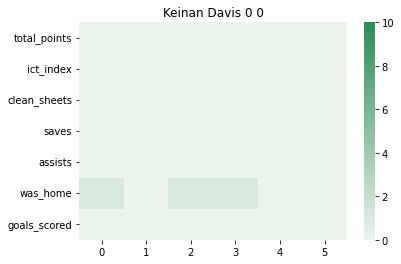

Player in Ollie Watkins. 5.586403129548303 To double trade  = True 


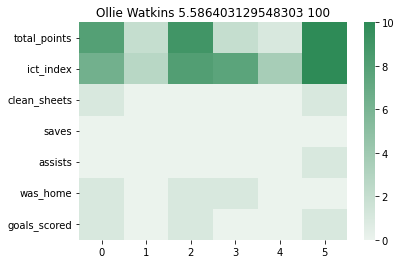

Player out Raheem Sterling. 0 To double trade  = True 


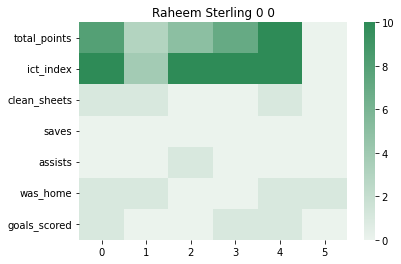

Player in James Ward-Prowse. 4.213530079644855 To double trade  = True 


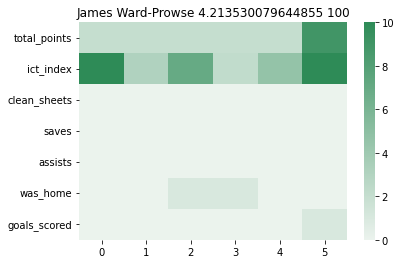

In [3]:
current_squad, non_squad = await get_current_squad(features, window=agent.window, num_players=agent.num_players)
current_squad, non_squad = await agent.get_new_squad(features)
squad = current_squad + non_squad

In [4]:

#agent.get_wildcard_squad(squad, max_weight=1000, visualize=False)

## Show game week id

In [5]:
os.environ['GAMEWEEK']

'18_2021'

## Use model to swap players

## Set playing 11

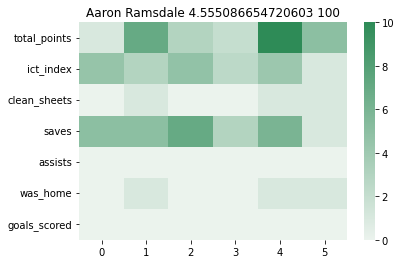

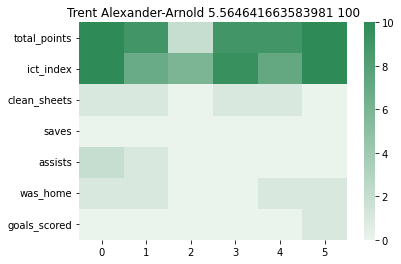

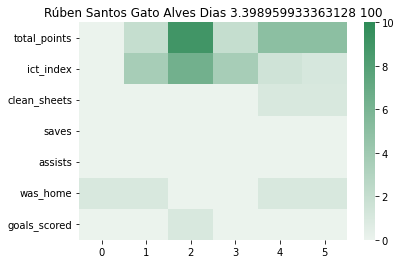

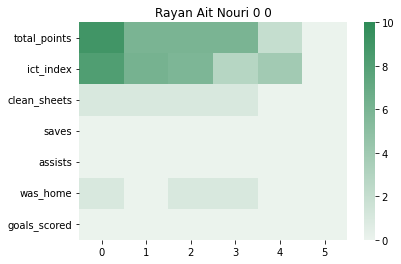

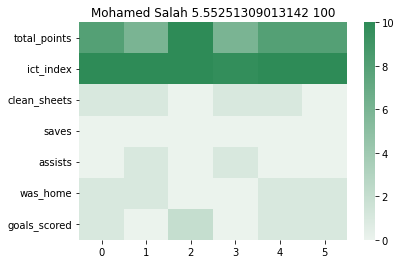

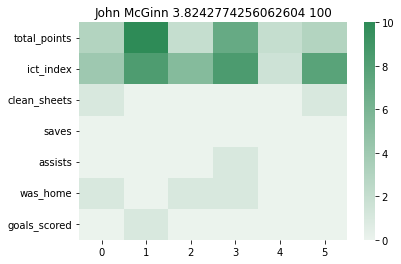

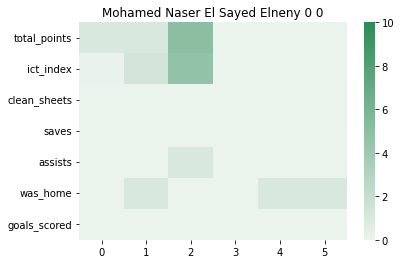

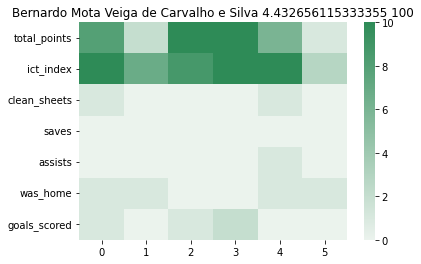

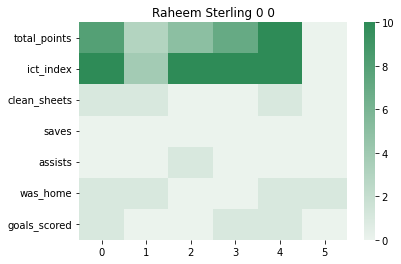

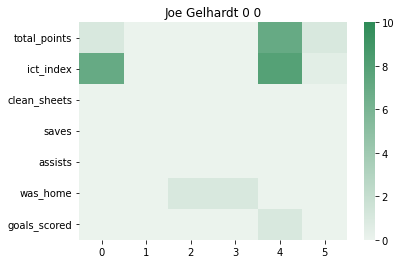

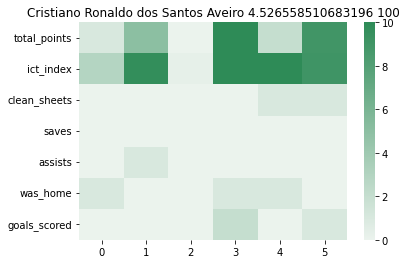

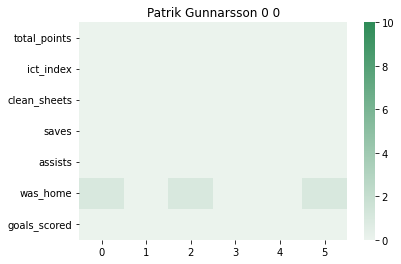

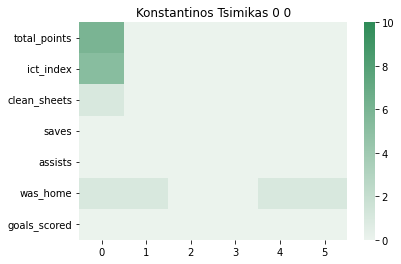

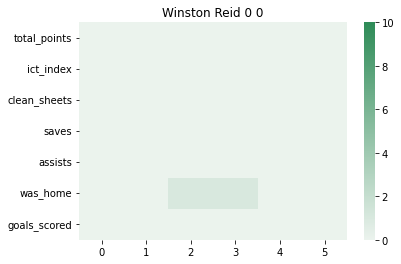

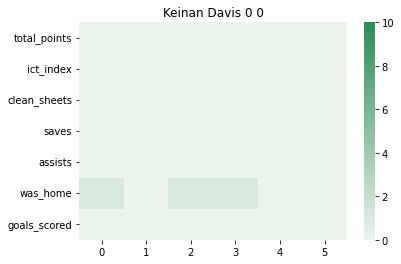

In [6]:
await agent.set_playing_11(current_squad, visualize=True)


## Highlight top performers by position for this week





Goalkeeper
David de Gea


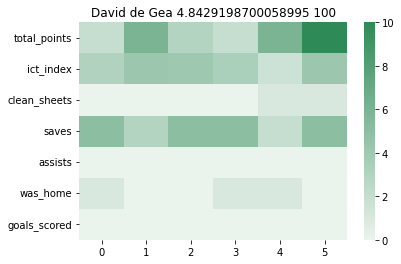

José Malheiro de Sá


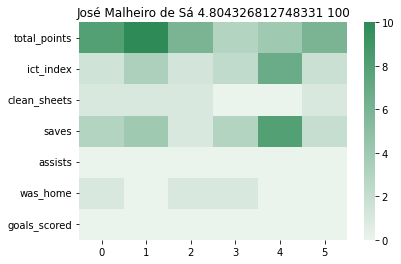

Lukasz Fabianski


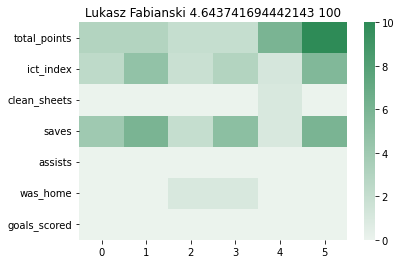

Aaron Ramsdale


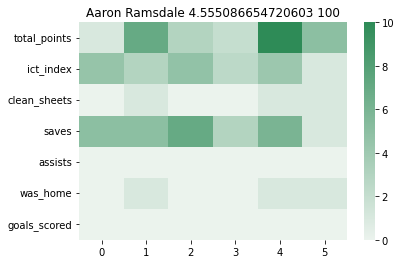

Nick Pope


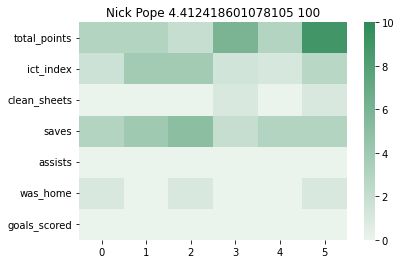










Defender
Trent Alexander-Arnold


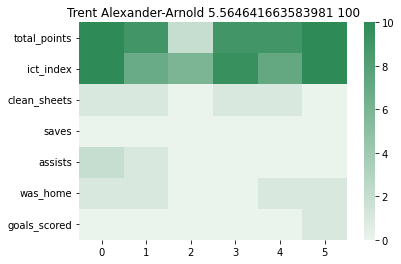

Romain Saïss


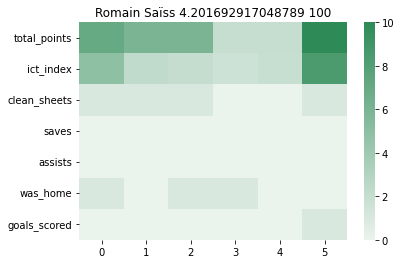

Takehiro Tomiyasu


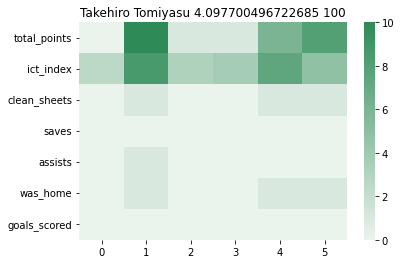

Reece James


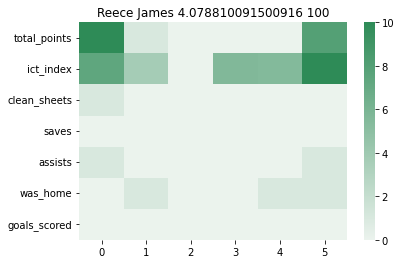

Andrew Robertson


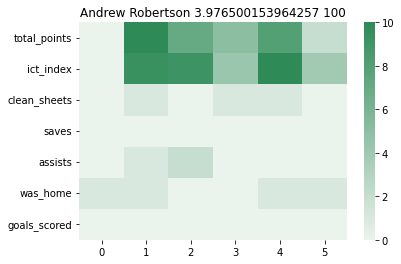










Midfielder
Mohamed Salah


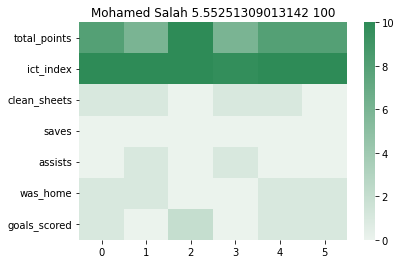

Diogo Jota


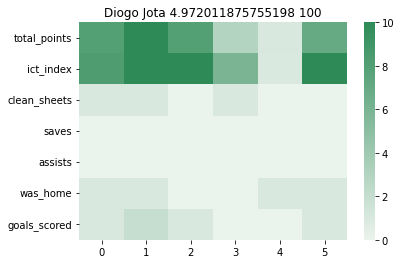

Mason Mount


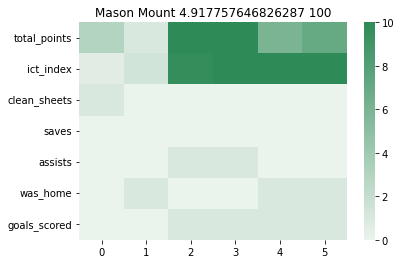

Heung-Min Son


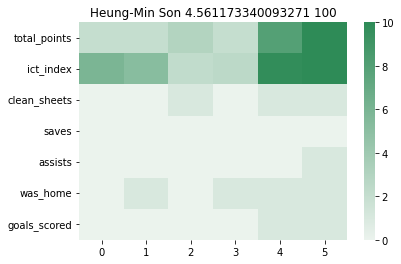

Sadio Mané


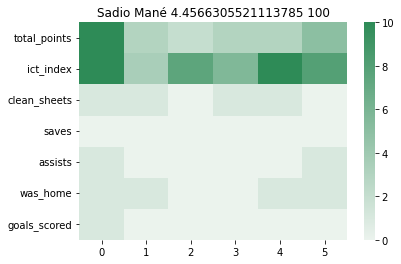










Forward
Ollie Watkins


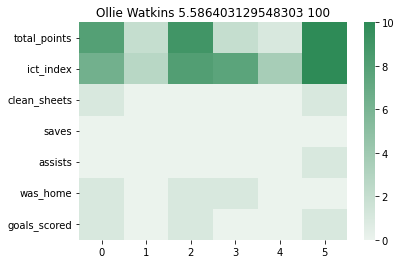

Cristiano Ronaldo dos Santos Aveiro


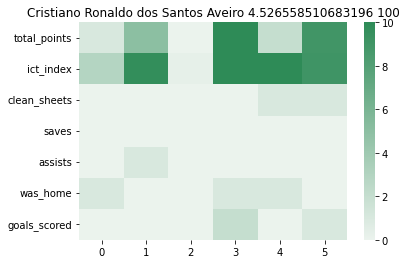

Emmanuel Dennis


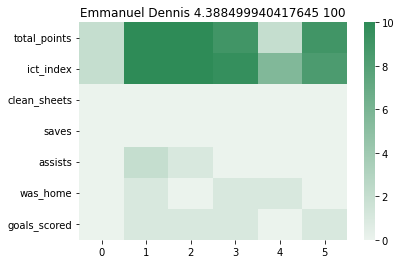

Armando Broja


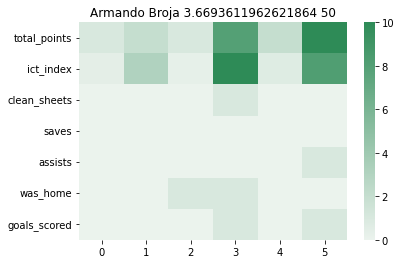

Alexandre Lacazette


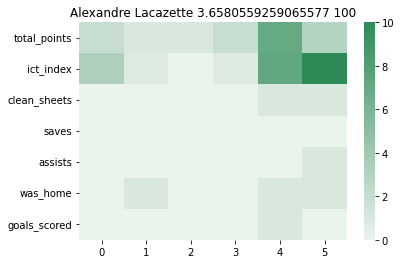

In [7]:
agent.show_top_performers(current_squad + non_squad, k=5)